In [3]:
# Import pandas, numpy, matplotlib, seaborn libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from matplotlib.backends.backend_pdf import PdfPages
import datetime

## Data Understanding of 'rt_trips_DB_2018.txt'

### Preliminary check of data

Import 'rt_trips_DB_2018.txt' file.

In [15]:
# reading rt_trips_DB_2018.txt as a dataframe
dftrips = pd.read_csv("rt_trips_DB_2018.txt", sep=';')

In [16]:
dftrips.head(10)

,DATASOURCE,DAYOFSERVICE,TRIPID,LINEID,ROUTEID,DIRECTION,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,BASIN,TENDERLOT,SUPPRESSED,JUSTIFICATIONID,LASTUPDATE,NOTE
0,DB,07-FEB-18 00:00:00,6253783,68,68_80,1,87245,84600,87524.0,84600.0,BasDef,NaN,NaN,NaN,28-FEB-18 12:05:11,",2967409,"
1,DB,07-FEB-18 00:00:00,6262138,25B,25B_271,2,30517,26460,32752.0,NaN,BasDef,NaN,NaN,NaN,28-FEB-18 12:05:11,",2580260,"
2,DB,07-FEB-18 00:00:00,6254942,45A,45A_70,2,35512,32100,36329.0,32082.0,BasDef,NaN,NaN,NaN,28-FEB-18 12:05:11,",2448968,"
3,DB,07-FEB-18 00:00:00,6259460,25A,25A_273,1,57261,54420,58463.0,54443.0,BasDef,NaN,NaN,NaN,28-FEB-18 12:05:11,",3094242,"
4,DB,07-FEB-18 00:00:00,6253175,14,14_15,1,85383,81600,84682.0,81608.0,BasDef,NaN,NaN,NaN,28-FEB-18 12:05:11,",2526331,"
5,DB,07-FEB-18 00:00:00,6248240,77A,77A_28,2,41648,37200,42019.0,37538.0,BasDef,NaN,NaN,NaN,28-FEB-18 12:05:11,",2966500,"
6,DB,07-FEB-18 00:00:00,6251760,39,39_21,2,34768,28920,35709.0,28929.0,BasDef,NaN,NaN,NaN,28-FEB-18 12:05:11,",2422850,"
7,DB,07-FEB-18 00:00:00,6262909,16,16_20,1,43936,38880,43721.0,38955.0,BasDef,NaN,NaN,NaN,28-FEB-18 12:05:11,",3045261,"
8,DB,07-FEB-18 00:00:00,6251147,40D,40D_102,1,33558,30600,34540.0,31185.0,BasDef,NaN,NaN,NaN,28-FEB-18 12:05:11,",2837123,"
9,DB,07-FEB-18 00:00:00,6249435,27B,27B_34,2,52682,49800,53281.0,49974.0,BasDef,NaN,NaN,NaN,28-FEB-18 12:05:11,",2329338,"


In [17]:
dftrips.dtypes

DATASOURCE          object
DAYOFSERVICE        object
TRIPID               int64
LINEID              object
ROUTEID             object
DIRECTION            int64
PLANNEDTIME_ARR      int64
PLANNEDTIME_DEP      int64
ACTUALTIME_ARR     float64
ACTUALTIME_DEP     float64
BASIN               object
TENDERLOT          float64
SUPPRESSED         float64
JUSTIFICATIONID    float64
LASTUPDATE          object
NOTE                object
dtype: object

In [18]:
#Convert the datatype of dftrips into proper type
categorical_columns = dftrips[['DATASOURCE', 'TRIPID', 'LINEID','ROUTEID','BASIN','NOTE']].columns
continuous_columns = dftrips[['DIRECTION','PLANNEDTIME_ARR','PLANNEDTIME_DEP','ACTUALTIME_ARR','ACTUALTIME_DEP','TENDERLOT','SUPPRESSED','JUSTIFICATIONID']].columns
datetime_columns = dftrips[['DAYOFSERVICE', 'LASTUPDATE']].columns

for column in categorical_columns:
    dftrips[column] = dftrips[column].astype('category')  

for column in datetime_columns:
    dftrips[column] = pd.to_datetime(dftrips[column]).astype('datetime64')  
    
dftrips.dtypes

DATASOURCE               category
DAYOFSERVICE       datetime64[ns]
TRIPID                   category
LINEID                   category
ROUTEID                  category
DIRECTION                   int64
PLANNEDTIME_ARR             int64
PLANNEDTIME_DEP             int64
ACTUALTIME_ARR            float64
ACTUALTIME_DEP            float64
BASIN                    category
TENDERLOT                 float64
SUPPRESSED                float64
JUSTIFICATIONID           float64
LASTUPDATE         datetime64[ns]
NOTE                     category
dtype: object

In [19]:
# Print table with categorical statistics
dftrips.select_dtypes(['category']).describe().T

,count,unique,top,freq
DATASOURCE,2182637,1,DB,2182637
TRIPID,2182637,658964,7327038,19
LINEID,2182637,130,46A,76728
ROUTEID,2182637,588,46A_74,37182
BASIN,2182637,1,BasDef,2182637
NOTE,2182637,46690,",2703274,",244


In [20]:
# Print table with continuous statistics
dftrips.select_dtypes(include=['float64','int64']).describe().T

,count,mean,std,min,25%,50%,75%,max
DIRECTION,2182637.0,1.504103,0.499983,1.0,1.0,2.0,2.00,2.0
PLANNEDTIME_ARR,2182637.0,55078.747653,17424.822304,18203.0,39683.0,55276.0,69006.00,91680.0
PLANNEDTIME_DEP,2182637.0,51533.292820,17571.637274,16200.0,36000.0,51600.0,65160.00,87600.0
ACTUALTIME_ARR,2045430.0,55062.388280,17338.699154,17546.0,39668.0,55189.0,69019.00,94378.0
ACTUALTIME_DEP,2018086.0,51706.116583,17526.948184,15974.0,36518.0,51618.0,65398.00,97177.0
TENDERLOT,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SUPPRESSED,4333.0,0.000000,0.000000,0.0,0.0,0.0,0.00,0.0
JUSTIFICATIONID,4330.0,237554.867667,34585.051789,177856.0,205506.5,233851.5,271506.75,297899.0


In [21]:
# counting the null values.
dftrips.isna().sum()

DATASOURCE               0
DAYOFSERVICE             0
TRIPID                   0
LINEID                   0
ROUTEID                  0
DIRECTION                0
PLANNEDTIME_ARR          0
PLANNEDTIME_DEP          0
ACTUALTIME_ARR      137207
ACTUALTIME_DEP      164551
BASIN                    0
TENDERLOT          2182637
SUPPRESSED         2178304
JUSTIFICATIONID    2178307
LASTUPDATE               0
NOTE                     0
dtype: int64

In [22]:
#Checking the duplicated values in TRIPID.
dftrips[dftrips['TRIPID'].duplicated()]

,DATASOURCE,DAYOFSERVICE,TRIPID,LINEID,ROUTEID,DIRECTION,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,BASIN,TENDERLOT,SUPPRESSED,JUSTIFICATIONID,LASTUPDATE,NOTE
3434,DB,2018-09-26,7772729,63,63_28,2,26822,24300,26479.0,NaN,BasDef,NaN,NaN,NaN,2018-10-18 18:01:47,",2798256,"
3448,DB,2018-09-26,7774155,122,122_20,2,39038,35400,39032.0,35405.0,BasDef,NaN,NaN,NaN,2018-10-18 18:01:47,",3313692,"
3474,DB,2018-09-28,7766662,130,130_10,1,56651,54900,56869.0,54947.0,BasDef,NaN,NaN,NaN,2018-10-18 18:30:27,",2739062,"
3477,DB,2018-09-28,7758239,38,38_14,2,46950,42960,47351.0,43084.0,BasDef,NaN,NaN,NaN,2018-10-18 18:30:27,",2695497,"
3481,DB,2018-09-28,7773074,29A,29A_15,2,54193,51600,55509.0,51936.0,BasDef,NaN,NaN,NaN,2018-10-18 18:30:27,",2669204,"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2182632,DB,2018-05-14,6765849,123,123_36,2,61560,57840,61365.0,57859.0,BasDef,NaN,NaN,NaN,2018-06-26 09:13:13,",3216350,"
2182633,DB,2018-05-14,6765469,75,75_17,1,53416,48600,NaN,48823.0,BasDef,NaN,NaN,NaN,2018-06-26 09:13:13,",2865284,"
2182634,DB,2018-05-14,6765486,33D,33D_62,2,29460,26400,29904.0,NaN,BasDef,NaN,NaN,NaN,2018-06-26 09:13:13,",3077688,"
2182635,DB,2018-05-14,6764987,70,70_60,1,65277,60600,66341.0,NaN,BasDef,NaN,NaN,NaN,2018-06-26 09:13:13,",3208841,"


In [23]:
dftrips[dftrips.duplicated(['TRIPID','DAYOFSERVICE'])]

,DATASOURCE,DAYOFSERVICE,TRIPID,LINEID,ROUTEID,DIRECTION,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,BASIN,TENDERLOT,SUPPRESSED,JUSTIFICATIONID,LASTUPDATE,NOTE


From the above checking, we found out that TRIPID is not the unique ID to identify every single bus trip in dftrips. However, no duplicated TRIPID in a complete service day, indicating that the combination of TRIPID and DAYOFSERVICE is unique.

In [11]:
#Check all the LINEID in dftrips.
dftrips['LINEID'].unique()

['68', '25B', '45A', '25A', '14', ..., '116', '77X', '16D', '33E', '41D']
Length: 130
Categories (130, object): ['68', '25B', '45A', '25A', ..., '77X', '16D', '33E', '41D']

In [12]:
#Check the number of values of each LINEID.
dftrips['LINEID'].value_counts()

46A    76728
145    62730
15     58083
40     56974
39A    55301
       ...  
68X      243
51X      238
16D       84
41D       36
33E       14
Name: LINEID, Length: 130, dtype: int64

In [13]:
#Check the number of values of ROUTEID.
dftrips['ROUTEID'].value_counts()

46A_74     37182
46A_67     35759
145_102    29259
15_17      28471
145_105    27964
           ...  
41B_58         5
140_16         5
14C_10         4
41X_131        4
33D_76         2
Name: ROUTEID, Length: 588, dtype: int64

In [14]:
#Check the number of values of ROUTEID for bus line 46A.
dftrips['ROUTEID'].loc[dftrips['LINEID']=='46A'].value_counts()

46A_74    37182
46A_67    35759
46A_66      979
46A_64      397
46A_73      350
          ...  
26_26         0
26_27         0
26_28         0
26_29         0
9_8           0
Name: ROUTEID, Length: 588, dtype: int64

In [15]:
#Check the direction of dftrips
dftrips['DIRECTION'].value_counts()

2    1100273
1    1082364
Name: DIRECTION, dtype: int64

In [16]:
#Check the values of column 'SUPPRESSED'
dftrips['SUPPRESSED'].unique()

array([nan,  0.])

In [17]:
#Check the rows of dftrips when 'SUPPRESSED' == 0('SUPPRESSED' == 0 indicates the planned trips were canceled)
dftrips.loc[dftrips['SUPPRESSED'] == 0]

,DATASOURCE,DAYOFSERVICE,TRIPID,LINEID,ROUTEID,DIRECTION,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,BASIN,TENDERLOT,SUPPRESSED,JUSTIFICATIONID,LASTUPDATE,NOTE
1783,DB,2018-02-18,6269995,45A,45A_60,1,68767,65700,NaN,65746.0,BasDef,NaN,0.0,194642.0,2018-02-26 11:09:33,",2428302,"
2363,DB,2018-03-16,6399287,41C,41C_78,1,71543,68400,NaN,68643.0,BasDef,NaN,0.0,205589.0,2018-03-26 12:55:43,",1741586,"
3485,DB,2018-09-28,7758815,13,13_72,2,77076,72000,77726.0,NaN,BasDef,NaN,0.0,271333.0,2018-10-18 18:30:27,",2589790,"
3873,DB,2018-02-18,6277942,54A,54A_12,2,56910,54000,NaN,53972.0,BasDef,NaN,0.0,194644.0,2018-02-26 11:09:33,",1752467,"
4353,DB,2018-03-10,6400436,16,16_20,1,66230,61200,NaN,63250.0,BasDef,NaN,0.0,204650.0,2018-03-19 14:54:09,",1892345,"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2180333,DB,2018-05-15,6756431,40D,40D_101,1,83064,81000,NaN,80899.0,BasDef,NaN,0.0,231822.0,2018-06-26 09:23:03,",2837996,"
2181600,DB,2018-05-14,6761229,46A,46A_67,2,62024,56880,61946.0,NaN,BasDef,NaN,0.0,231784.0,2018-06-26 09:13:13,",3064930,"
2181789,DB,2018-05-15,6759169,66,66_13,2,41797,38100,41937.0,NaN,BasDef,NaN,0.0,231826.0,2018-06-26 09:23:03,",2295846,"
2182138,DB,2018-05-15,6753428,123,123_34,1,60475,56400,60008.0,NaN,BasDef,NaN,0.0,231813.0,2018-06-26 09:23:03,",3218907,"


In [18]:
#Check the null value in actual time when 'SUPPRESSED' != 0
dftrips.loc[(dftrips['SUPPRESSED'] != 0) & ((np.isnan(dftrips["ACTUALTIME_DEP"])) | (np.isnan(dftrips["ACTUALTIME_ARR"])))]


,DATASOURCE,DAYOFSERVICE,TRIPID,LINEID,ROUTEID,DIRECTION,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,BASIN,TENDERLOT,SUPPRESSED,JUSTIFICATIONID,LASTUPDATE,NOTE
1,DB,2018-02-07,6262138,25B,25B_271,2,30517,26460,32752.0,NaN,BasDef,NaN,NaN,NaN,2018-02-28 12:05:11,",2580260,"
21,DB,2018-02-07,6258154,49,49_28,2,79199,76800,NaN,76850.0,BasDef,NaN,NaN,NaN,2018-02-28 12:05:11,",3010723,"
24,DB,2018-02-07,6246014,123,123_34,1,42848,39600,43203.0,NaN,BasDef,NaN,NaN,NaN,2018-02-28 12:05:11,",2968050,"
34,DB,2018-02-07,6253738,76,76_37,2,58000,55200,59381.0,NaN,BasDef,NaN,NaN,NaN,2018-02-28 12:05:11,",1866216,"
46,DB,2018-02-18,6270605,41,41_3,1,67311,64200,67296.0,NaN,BasDef,NaN,NaN,NaN,2018-02-26 11:09:33,",1742993,"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2182622,DB,2018-05-14,6756429,40D,40D_102,1,66268,63000,66445.0,NaN,BasDef,NaN,NaN,NaN,2018-06-26 09:13:13,",2837991,"
2182623,DB,2018-05-14,6767663,40D,40D_104,2,44194,41400,44430.0,NaN,BasDef,NaN,NaN,NaN,2018-06-26 09:13:13,",2826305,"
2182633,DB,2018-05-14,6765469,75,75_17,1,53416,48600,NaN,48823.0,BasDef,NaN,NaN,NaN,2018-06-26 09:13:13,",2865284,"
2182634,DB,2018-05-14,6765486,33D,33D_62,2,29460,26400,29904.0,NaN,BasDef,NaN,NaN,NaN,2018-06-26 09:13:13,",3077688,"


From the above cells we find out that even though the value in SUPPRESSED indicates the cancelation of bus which causes missing value in actual time, there are still 285728 rows of instances with missing values in actual time while the 'SUPPRESSED' could not indicate.

In [19]:
#Check the values of column 'JUSTIFICATIONID'
dftrips['JUSTIFICATIONID'].value_counts()

203708.0    19
203707.0    15
204297.0    14
203715.0    14
204260.0    10
            ..
232106.0     1
204652.0     1
236117.0     1
291703.0     1
231978.0     1
Name: JUSTIFICATIONID, Length: 3526, dtype: int64

In [20]:
#Check the values of column 'Notes'.
dftrips['NOTE'].value_counts()

,2703274,    244
,1719150,    244
,1741154,    244
,2326480,    244
,2424575,    244
            ... 
,3163889,      1
,3163888,      1
,3163884,      1
,3163883,      1
,3179676,      1
Name: NOTE, Length: 46690, dtype: int64

<AxesSubplot:>

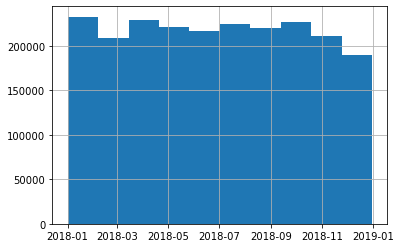

In [21]:
# plotting number of DAYOFSERVICE for dftrips dataset over 2018
dftrips['DAYOFSERVICE'].hist()

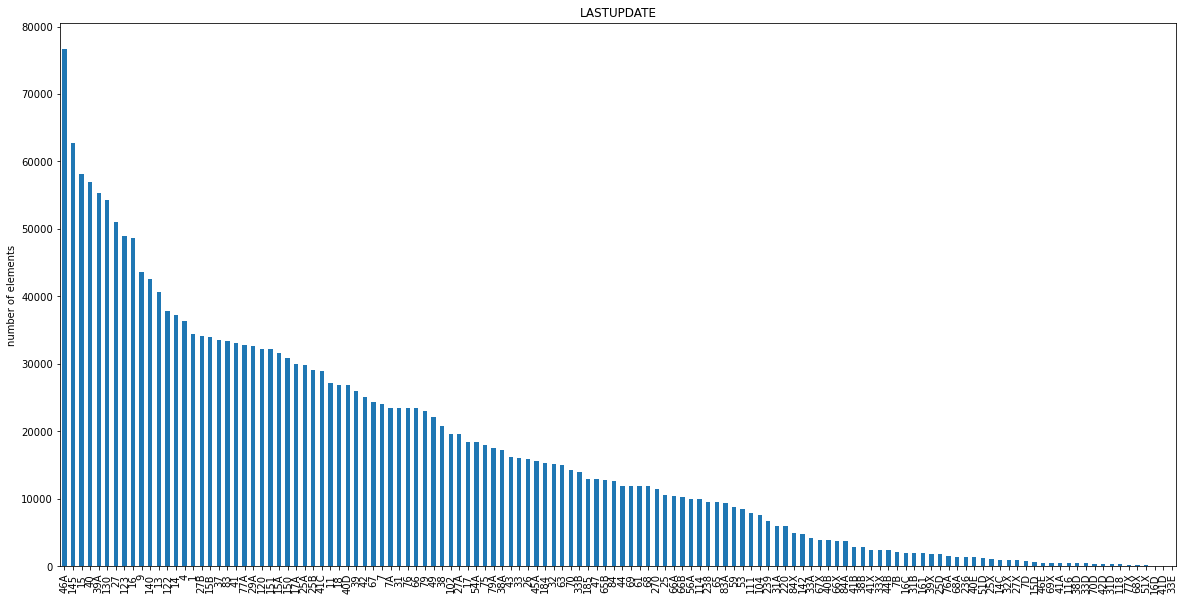

In [22]:
#plotting the number of LINEID for dftrips dataset
f = dftrips['LINEID'].value_counts(dropna=False).plot(kind='bar', title=column, figsize=(20,10))
plt.ylabel('number of elements')
plt.show()

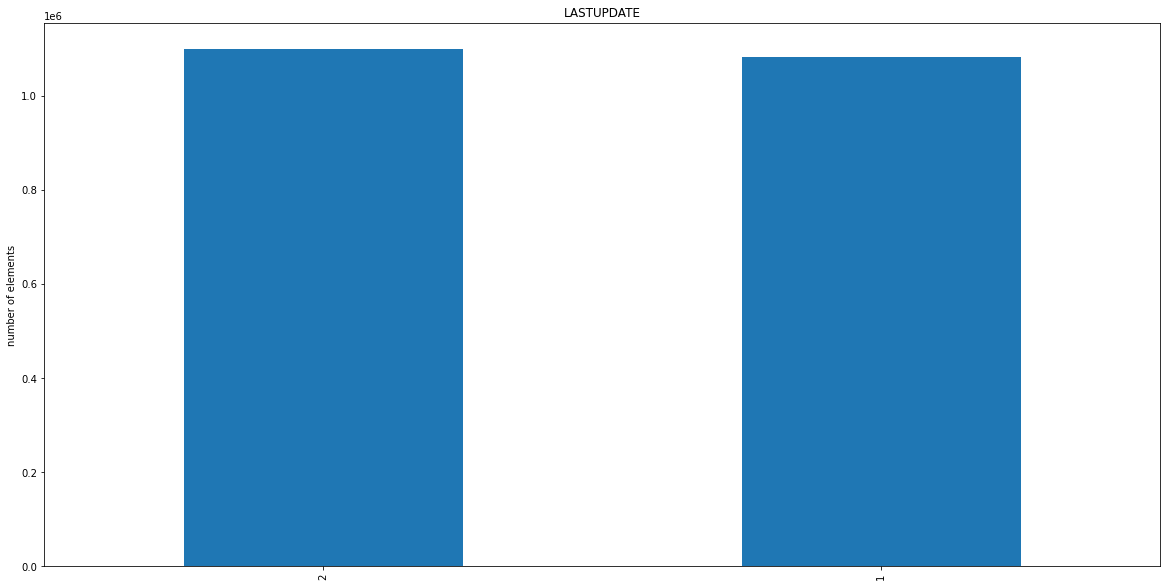

In [23]:
#plotting the number of DIRECTION for dftrips dataset
f = dftrips['DIRECTION'].value_counts(dropna=False).plot(kind='bar', title=column, figsize=(20,10))
plt.ylabel('number of elements')
plt.show()

<AxesSubplot:ylabel='Frequency'>

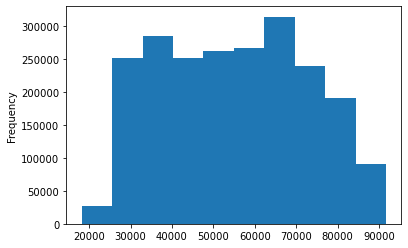

In [24]:
#plotting the hist of PLANNEDTIME_ARR
dftrips['PLANNEDTIME_ARR'].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

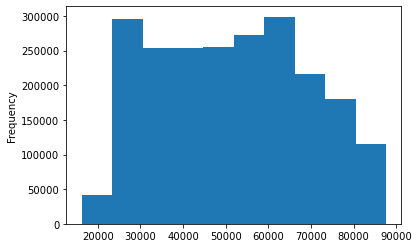

In [25]:
dftrips['PLANNEDTIME_DEP'].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

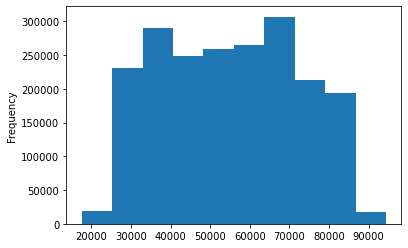

In [26]:
dftrips['ACTUALTIME_ARR'].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

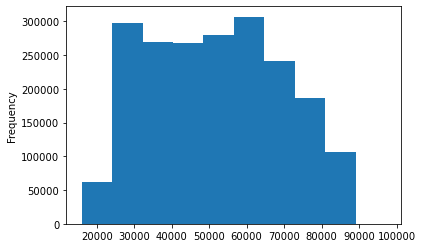

In [27]:
dftrips['ACTUALTIME_DEP'].plot(kind='hist')

### Logical integrity check

In [24]:
# test1 checks the range of date of service
test1 = dftrips[['DAYOFSERVICE']].loc[(dftrips['DAYOFSERVICE']<'2018-1-1') | (dftrips['DAYOFSERVICE']>'2018-12-31')]
test1

,DAYOFSERVICE


In [25]:
#test2 checks if the LINEID matches with the ROUTEID
test2 = dftrips[dftrips.apply(lambda x: x.LINEID in x.ROUTEID, axis = 1) == False]
print("The number of rows failing the test:", test2.shape[0])
test2

The number of rows failing the test: 0


,DATASOURCE,DAYOFSERVICE,TRIPID,LINEID,ROUTEID,DIRECTION,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,BASIN,TENDERLOT,SUPPRESSED,JUSTIFICATIONID,LASTUPDATE,NOTE


In [26]:
#test3 checks if the planned arriving time will be earlier than the departure time
test3 = dftrips[dftrips['PLANNEDTIME_ARR'] <= dftrips['PLANNEDTIME_DEP']]
test3

,DATASOURCE,DAYOFSERVICE,TRIPID,LINEID,ROUTEID,DIRECTION,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,BASIN,TENDERLOT,SUPPRESSED,JUSTIFICATIONID,LASTUPDATE,NOTE


In [27]:
#test4 checks if the actual arriving time will be earlier than the departure time
test4 = dftrips[dftrips['ACTUALTIME_ARR'] <= dftrips['ACTUALTIME_DEP']]
test4

,DATASOURCE,DAYOFSERVICE,TRIPID,LINEID,ROUTEID,DIRECTION,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,BASIN,TENDERLOT,SUPPRESSED,JUSTIFICATIONID,LASTUPDATE,NOTE
1619,DB,2018-06-21,7029435,150,150_8,1,75653,73800,76232.0,83371.0,BasDef,NaN,NaN,NaN,2018-06-29 15:43:00,",2961346,2961346,"
4473,DB,2018-09-26,7766397,65,65_74,1,38044,34200,38852.0,42653.0,BasDef,NaN,NaN,NaN,2018-10-18 18:01:47,",3086660,3086660,"
42164,DB,2018-09-28,7761061,150,150_8,1,75510,73800,76397.0,76692.0,BasDef,NaN,NaN,NaN,2018-10-18 18:30:27,",2961346,2961346,"
46421,DB,2018-06-19,7021290,43,43_84,1,59845,56400,59314.0,59962.0,BasDef,NaN,NaN,NaN,2018-06-27 10:55:33,",2332167,2332167,"
51585,DB,2018-03-22,6391220,56A,56A_31,1,74509,71100,74755.0,75180.0,BasDef,NaN,NaN,NaN,2018-04-04 08:59:06,",1743040,1743040,"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2086498,DB,2018-05-18,6761997,39,39_20,1,40565,36120,40745.0,41740.0,BasDef,NaN,NaN,NaN,2018-06-26 09:52:33,",2422852,2422852,"
2104373,DB,2018-07-29,7321713,25A,25A_273,1,74846,72120,75229.0,76777.0,BasDef,NaN,NaN,NaN,2018-08-18 17:20:12,",2420567,2420567,"
2139250,DB,2018-01-08,6091453,41C,41C_78,1,80078,77400,80522.0,80929.0,BasDef,NaN,NaN,NaN,2018-01-16 08:33:19,",1745620,1745620,"
2166972,DB,2018-05-12,6747229,65B,65B_66,2,73630,70200,74556.0,75609.0,BasDef,NaN,NaN,NaN,2018-06-26 08:53:33,",2819186,"


In [28]:
#save the index of failed instances in test4
index_of_test4 = test4.index

The rows above with actual arriving time earlier than the actual departure time is logically unreasonable, which should be dropped in the following process.

## Data Quality Report of 'rt_trips_DB_2018'

'rt_trips_DB_2018' file contains the data of essential information of bus trips. In the following cell I will discuss the findings of each features based on the data understanding processes above.

**DATASOURCE, BASIN:** only one value appears in the column of these features, therefore they are not considered conveying any useful information. 

**DAYOFSERVICE:** Recorded date infromation of bus service. From the plot we can see that there were slightly less bus trips in Nov and Dec of 2018.

**TRIPID:** TRIPID is the ID number of each bus trip. Please note that TRIPID is not the unique ID to identify every single bus trip in dftrips. However, no duplicated TRIPID in a complete service day, indicating that the combination of TRIPID and DAYOFSERVICE is unique.

**LINEID, ROUTEID:** LINEID indicates the line of bus that we are familiar with, i.e 46A, while ROUTEID reveals the different routes that every line of bus could have. For example, bus line 46A has 46A_74, 46A_67, 46A_66, 46A_64 and 46A_73 five different routes in total.

**DIRECTION:** Indicates the direction of each bus trip. and datat is almost even split between 1 and 2. No missing values.

**PLANNEDTIME_ARR, PLANNEDTIME_DEP, ACTUALTIME_ARR, ACTUALTIME_DEP :** The planned and acutual arriving and departure times of buses. However, 137207 and 164551 missing values lie in ACTUALTIME_ARR and ACTUALTIME_DEP.

**TENDERLOT, JUSTIFICATIONID:** Almost null value, considered to drop.

**SUPPRESSED:** indicates the planned trips were canceled when SUPPRESSED is 0. missing value may appear in ACTUALTIME_ARR if SUPPRESSED = 0.

**LASTUPDATE, NOTE:** do not consider conveying any useful information for analytics.

In [33]:
# list to store one trip for each lineid and direction
dftriplist = []

# looping over unique lineids
for lineid in dftrips['LINEID'].unique():
    for i in range(1, 3):
        # only want first instance that fits the description below
        dftriplist.append(dftrips[['LINEID', 'DIRECTION', 'DAYOFSERVICE', 'TRIPID']].loc[(dftrips['LINEID'] == lineid) & (dftrips['DIRECTION'] == i)].head(1))

dfsingletrip = pd.concat(dftriplist)

In [34]:
dfsingletrip

,LINEID,DIRECTION,DAYOFSERVICE,TRIPID
0,68,1,2018-02-07,6253783
594,68,2,2018-06-21,7023760
555,25B,1,2018-06-26,7109011
1,25B,2,2018-02-07,6262138
1658,45A,1,2018-06-26,7114255
...,...,...,...,...
18938,77X,2,2018-04-10,6614122
529817,16D,1,2018-12-06,8159151
588407,33E,1,2018-12-13,8174968
603484,41D,1,2018-12-13,8168184


# Data Understanding of 'rt_leavetimes_DB_2018.txt'

From the plot above we can see that bus line 46A has the greatest amount of data in dftrips, therefore we chose line 46A as exmaple for conducting data understanding and data cleaning of 'leavetimes'

In [35]:
# selecting the tripid where lineid is 46A
tripid_46A_list = dftrips['TRIPID'][dftrips['LINEID'] == '46A'].tolist()

In [36]:
# the file 'rt_leavetimes_DB_2018.txt' too big, we want to only load one route
# Our plan is to process the file in chunks and only add a line 46A to the dataframe

# line46A_df_list = []
# chunksize = 10 ** 6
# for chunk in pd.read_csv("rt_leavetimes_DB_2018.txt", sep=';', chunksize=chunksize):
#    line46A_df_list.append(chunk[chunk['TRIPID'].isin(tripid_46A_list)])

# df_line46A = pd.concat(line46A_df_list)

In [37]:
# #saving the line_46A data to a local csv
# df_line46A.to_csv("line_46A_leavetimes.csv", index=False)

In [157]:
# loading in the line 46A data from the local csv
df_line46A = pd.read_csv("line_46A_leavetimes.csv", parse_dates=[1, 16], infer_datetime_format=True)

In [158]:
df_line46A.head(10)

,DATASOURCE,DAYOFSERVICE,TRIPID,PROGRNUMBER,STOPPOINTID,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,VEHICLEID,PASSENGERS,PASSENGERSIN,PASSENGERSOUT,DISTANCE,SUPPRESSED,JUSTIFICATIONID,LASTUPDATE,NOTE
0,DB,2018-01-01,5970412,1,807,84600,84600,84442,84442,2868385,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-08 17:21:10,NaN
1,DB,2018-01-01,5970412,2,808,84644,84644,84617,84617,2868385,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-08 17:21:10,NaN
2,DB,2018-01-01,5970412,3,809,84670,84670,84631,84631,2868385,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-08 17:21:10,NaN
3,DB,2018-01-01,5970412,6,812,84754,84754,84676,84676,2868385,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-08 17:21:10,NaN
4,DB,2018-01-01,5970412,7,813,84776,84776,84691,84691,2868385,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-08 17:21:10,NaN
5,DB,2018-01-01,5957297,13,264,70916,70916,70765,70781,2868384,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-08 17:21:10,NaN
6,DB,2018-01-01,5961264,13,264,72716,72716,72405,72405,2868328,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-08 17:21:10,NaN
7,DB,2018-01-01,5961107,13,264,68516,68516,68453,68469,2868330,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-08 17:21:10,NaN
8,DB,2018-01-01,5972419,13,264,71816,71816,71596,71596,2868335,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-08 17:21:10,NaN
9,DB,2018-01-01,5962663,13,264,67916,67916,67867,67891,2868380,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-08 17:21:10,NaN


In [ ]:
#The following commanded cells is neglectable

In [40]:
# line46Aa_TRIPID_list = df_line46A['TRIPID'].unique().tolist()

In [41]:
# line46Aa_TRIPID_list

In [42]:
# df_line46A['TRAVEL_TIME_INTERVAL'] = 0

In [43]:
# for k in range(len(df_line46A)):
#     for i in line46Aa_TRIPID_list:
#         if df_line46A['TRIPID'][k] == i:
#             max_prog = df_line46A['PROGRNUMBER'].max()
#             print(max_prog)
#             for j in range(2,max_prog):
#                 df_line46A['TRAVEL_TIME_INTERVAL'][j] = df_line46A['ACTUALTIME_ARR'][j] - df_line46A['ACTUALTIME_ARR'][j-1]
#                 print(df_line46A['TRAVEL_TIME_INTERVAL'][j])

In [44]:
# for k in range(len(df_line46A)):
#     if df_line46A['TRIPID'][k] == 5970412:
#         max_prog = df_line46A['PROGRNUMBER'][df_line46A['TRIPID'] == 5970412].max()
#         print('max=',max_prog)
#         for j in range(2,max_prog):
#             df_line46A['TRAVEL_TIME_INTERVAL'][df_line46A['PROGRNUMBER']==j] = df_line46A['ACTUALTIME_ARR'][df_line46A['PROGRNUMBER']==j] - df_line46A['ACTUALTIME_ARR'][df_line46A['PROGRNUMBER']==(j-1)]
#             #np.where(df_line46A['TRIPID'] == 5970412, df_line46A['ACTUALTIME_ARR'][df_line46A['PROGRNUMBER']==j] - df_line46A['ACTUALTIME_ARR'][df_line46A['PROGRNUMBER']==(j-1)], 0)
#             print(df_line46A['TRAVEL_TIME_INTERVAL'][j])

In [45]:
df_line46A.shape

(4347787, 18)

In [159]:
df_line46A.dtypes

DATASOURCE                 object
DAYOFSERVICE       datetime64[ns]
TRIPID                      int64
PROGRNUMBER                 int64
STOPPOINTID                 int64
PLANNEDTIME_ARR             int64
PLANNEDTIME_DEP             int64
ACTUALTIME_ARR              int64
ACTUALTIME_DEP              int64
VEHICLEID                   int64
PASSENGERS                float64
PASSENGERSIN              float64
PASSENGERSOUT             float64
DISTANCE                  float64
SUPPRESSED                float64
JUSTIFICATIONID           float64
LASTUPDATE         datetime64[ns]
NOTE                      float64
dtype: object

In [160]:
#Convert the datatype of df_line46A into proper type
categorical_columns = df_line46A[['TRIPID','DATASOURCE','NOTE']].columns
continuous_columns = df_line46A[['PROGRNUMBER','STOPPOINTID','PLANNEDTIME_ARR','PLANNEDTIME_DEP','ACTUALTIME_ARR','ACTUALTIME_DEP','VEHICLEID','PASSENGERS','PASSENGERSIN','PASSENGERSOUT','DISTANCE','SUPPRESSED','JUSTIFICATIONID']].columns
datetime_columns = df_line46A[['DAYOFSERVICE', 'LASTUPDATE']].columns

for column in categorical_columns:
    df_line46A[column] = df_line46A[column].astype('category')  

# for column in datetime_columns:
#     df_line46A[column] = pd.to_datetime(dftrips[column]).astype('datetime64')  
    
df_line46A.dtypes

DATASOURCE               category
DAYOFSERVICE       datetime64[ns]
TRIPID                   category
PROGRNUMBER                 int64
STOPPOINTID                 int64
PLANNEDTIME_ARR             int64
PLANNEDTIME_DEP             int64
ACTUALTIME_ARR              int64
ACTUALTIME_DEP              int64
VEHICLEID                   int64
PASSENGERS                float64
PASSENGERSIN              float64
PASSENGERSOUT             float64
DISTANCE                  float64
SUPPRESSED                float64
JUSTIFICATIONID           float64
LASTUPDATE         datetime64[ns]
NOTE                     category
dtype: object

## Data Understanding

In [161]:
#Check duplicated row
df_line46A.duplicated().sum()

0

In [49]:
#Check null value
df_line46A.isnull().sum()

DATASOURCE               0
DAYOFSERVICE             0
TRIPID                   0
PROGRNUMBER              0
STOPPOINTID              0
PLANNEDTIME_ARR          0
PLANNEDTIME_DEP          0
ACTUALTIME_ARR           0
ACTUALTIME_DEP           0
VEHICLEID                0
PASSENGERS         4347787
PASSENGERSIN       4347787
PASSENGERSOUT      4347787
DISTANCE           4347787
SUPPRESSED         4314723
JUSTIFICATIONID    4314723
LASTUPDATE               0
NOTE               4347787
dtype: int64

As we can see above, the columns of PASSENGERS, PASSENGERSIN, PASSENGERSOUT, DISTANCE, SUPPERSSED, JUSTIFICATIONID and NOTE only contain null values/ large proportion of null value, therefore, they should be dropped when cleaning the data.

In [50]:
# Print table with datetime statistics
df_line46A.select_dtypes(['datetime64']).describe().T

<ipython-input-50-567e09939483>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_line46A.select_dtypes(['datetime64']).describe().T
<ipython-input-50-567e09939483>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_line46A.select_dtypes(['datetime64']).describe().T


,count,unique,top,freq,first,last
DAYOFSERVICE,4347787,360,2018-04-16 00:00:00,15056,2018-01-01 00:00:00,2018-12-31 00:00:00
LASTUPDATE,4347787,360,2018-05-16 17:29:16,15056,2018-01-08 17:21:10,2019-01-16 18:27:21


In [51]:
# Print table with categorical statistics
df_line46A.select_dtypes(['category']).describe().T

,count,unique,top,freq
DATASOURCE,4347787,1,DB,4347787
TRIPID,4347787,23279,7322629,1197
NOTE,0,0,NaN,NaN


In [52]:
# Print table with continuous statistics
df_line46A.select_dtypes(include=['int64','float64']).describe().T

,count,mean,std,min,25%,50%,75%,max
PROGRNUMBER,4347787.0,3.085228e+01,1.766707e+01,1.0,1.600000e+01,3.100000e+01,4.600000e+01,6.500000e+01
STOPPOINTID,4347787.0,1.738182e+03,1.514804e+03,2.0,7.860000e+02,9.070000e+02,2.045000e+03,7.689000e+03
PLANNEDTIME_ARR,4347787.0,5.312911e+04,1.695360e+04,18900.0,3.860100e+04,5.290700e+04,6.694300e+04,8.716200e+04
PLANNEDTIME_DEP,4347787.0,5.312911e+04,1.695360e+04,18900.0,3.860100e+04,5.290700e+04,6.694300e+04,8.716200e+04
ACTUALTIME_ARR,4347787.0,5.330270e+04,1.696315e+04,18798.0,3.871300e+04,5.309900e+04,6.720100e+04,8.953700e+04
ACTUALTIME_DEP,4347787.0,5.331849e+04,1.696245e+04,18798.0,3.872700e+04,5.311500e+04,6.721800e+04,8.953700e+04
VEHICLEID,4347787.0,1.702914e+06,7.544140e+05,1000142.0,1.000558e+06,1.001193e+06,2.406888e+06,3.393877e+06
PASSENGERS,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PASSENGERSIN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PASSENGERSOUT,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
#Check the TRIPID of df_line46A
df_line46A['TRIPID'].value_counts()

7322629    1197
7331852    1197
7331850    1197
7331119    1196
7318090    1195
           ... 
8049176       1
8058183       1
6745538       1
6584117       1
7785909       1
Name: TRIPID, Length: 23279, dtype: int64

In [54]:
# number of unique TRIPID
print("Number of unique trip IDs:", len(df_line46A['TRIPID'].unique()))

Number of unique trip IDs: 23279


In [55]:
#Check the STOPPOINTID of line 46A
df_line46A["STOPPOINTID"].unique()

array([ 807,  808,  809,  812,  813,  264, 6059,  334,  406,  747,  842,
        845,   81,  818,  819,  810,  811,  814,  817, 2039,  846,  847,
       4636, 2016,  848, 2015, 2017, 2795, 2018,  756,  757, 2019,  758,
       2020, 2021,  759, 2022,  760,  761, 4565,  762, 4566, 4567,  763,
       2007, 2031, 2008, 2032, 2009, 2033, 2034, 2010,  435, 2035, 7353,
       2036, 4571, 2013, 2014, 2061, 2062, 2063, 2040, 2041, 2042, 2043,
       2044, 2045, 2046, 4568, 4569, 7658, 4570, 2056, 2057, 2058, 2059,
       2060, 2064, 2065, 4727, 4728,  461, 2068, 2069, 2070, 2084,  768,
        769,  770,  771,  772,  773,  774,  775,  776,  777,  906,  907,
        908,  909,  786,  792,  320,  278,  192,  797,  800,  804,  798,
       7491,    2,  795,  802,  801,  796,  806,  805,  803,  799, 4962,
        767, 7513,  401, 7688, 7689])

In [56]:
#Check the value counts for DAYOFSERVICE
print(df_line46A['DAYOFSERVICE'].value_counts())
print("Number of unique Day of Service:", len(df_line46A['DAYOFSERVICE'].unique()))

2018-04-16    15056
2018-01-18    15002
2018-05-08    14933
2018-02-20    14904
2018-04-03    14900
              ...  
2018-12-26     7384
2018-06-03     7098
2018-05-20     7065
2018-03-17     7029
2018-03-03     2615
Name: DAYOFSERVICE, Length: 360, dtype: int64
Number of unique Day of Service: 360


In [57]:
#check the value counts for PROGRNUMBER
df_line46A['PROGRNUMBER'].value_counts()

32    73328
1     73152
35    73146
34    73075
33    72962
      ...  
61    34111
62    27833
63    26426
64    25626
65     2331
Name: PROGRNUMBER, Length: 65, dtype: int64

<AxesSubplot:>

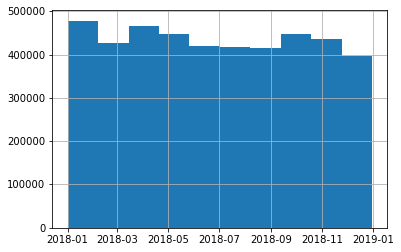

In [58]:
# plotting number of DAYOFSERVICE for line 46A over 2018
df_line46A['DAYOFSERVICE'].hist()

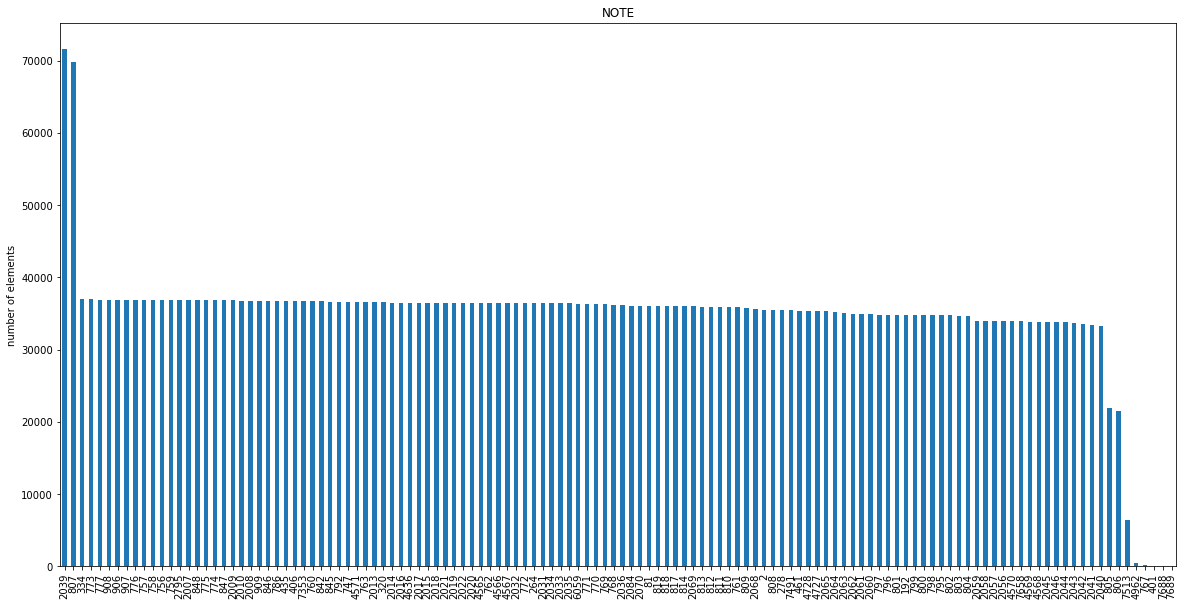

In [59]:
#plotting the number of STOPPOINTID for line 46A
f = df_line46A['STOPPOINTID'].value_counts(dropna=False).plot(kind='bar', title=column, figsize=(20,10))
plt.ylabel('number of elements')
plt.show()

In the following cells, I randomly chose a TRIPID for some simple logical tests.

In [60]:
df_line46A.loc[df_line46A['TRIPID'] == 5970412]

,DATASOURCE,DAYOFSERVICE,TRIPID,PROGRNUMBER,STOPPOINTID,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,VEHICLEID,PASSENGERS,PASSENGERSIN,PASSENGERSOUT,DISTANCE,SUPPRESSED,JUSTIFICATIONID,LASTUPDATE,NOTE
0,DB,2018-01-01,5970412,1,807,84600,84600,84442,84442,2868385,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-08 17:21:10,NaN
1,DB,2018-01-01,5970412,2,808,84644,84644,84617,84617,2868385,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-08 17:21:10,NaN
2,DB,2018-01-01,5970412,3,809,84670,84670,84631,84631,2868385,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-08 17:21:10,NaN
3,DB,2018-01-01,5970412,6,812,84754,84754,84676,84676,2868385,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-08 17:21:10,NaN
4,DB,2018-01-01,5970412,7,813,84776,84776,84691,84691,2868385,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-08 17:21:10,NaN
399,DB,2018-01-01,5970412,9,81,84852,84852,84758,84758,2868385,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-08 17:21:10,NaN
400,DB,2018-01-01,5970412,11,818,84914,84914,84792,84792,2868385,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-08 17:21:10,NaN
401,DB,2018-01-01,5970412,12,819,84977,84977,84878,84878,2868385,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-08 17:21:10,NaN
402,DB,2018-01-01,5970412,13,264,85044,85044,84912,84912,2868385,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-08 17:21:10,NaN
403,DB,2018-01-01,5970412,14,6059,85110,85110,84942,84942,2868385,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-08 17:21:10,NaN


In [61]:
dftrips.loc[dftrips['TRIPID'] == 5970412]

,DATASOURCE,DAYOFSERVICE,TRIPID,LINEID,ROUTEID,DIRECTION,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,BASIN,TENDERLOT,SUPPRESSED,JUSTIFICATIONID,LASTUPDATE,NOTE
2073830,DB,2018-01-01,5970412,46A,46A_73,1,85212,84600,85024.0,84442.0,BasDef,NaN,NaN,NaN,2018-01-08 17:21:10,",2457915,"


Date of service '2018-01-01' match with the dates in df_line46A when the TRIPID is the same

In [62]:
df_line46A['PROGRNUMBER'].loc[df_line46A['TRIPID'] == 5970412].value_counts()

1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    1
12    1
13    1
14    1
15    1
Name: PROGRNUMBER, dtype: int64

From the cell above we know that even the TRIPID duplicated in the df_line46A, each row has unique PROGRNUMBER.

We will plot arr times and dep times in the following cells.

<AxesSubplot:ylabel='Frequency'>

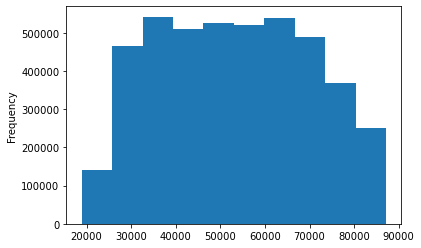

In [63]:
df_line46A['PLANNEDTIME_ARR'].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

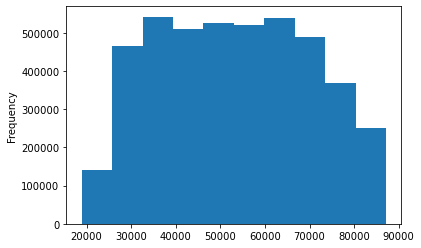

In [64]:
df_line46A['PLANNEDTIME_DEP'].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

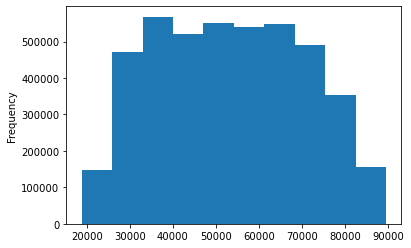

In [65]:
df_line46A['ACTUALTIME_ARR'].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

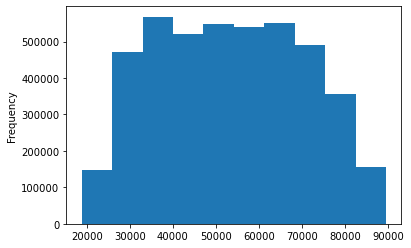

In [66]:
df_line46A['ACTUALTIME_DEP'].plot(kind='hist')

In [67]:
df_line46A.loc[df_line46A['SUPPRESSED'] == 1]

,DATASOURCE,DAYOFSERVICE,TRIPID,PROGRNUMBER,STOPPOINTID,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,VEHICLEID,PASSENGERS,PASSENGERSIN,PASSENGERSOUT,DISTANCE,SUPPRESSED,JUSTIFICATIONID,LASTUPDATE,NOTE
2379,DB,2018-01-01,5972182,31,763,46555,46555,47563,47563,2868326,NaN,NaN,NaN,NaN,1.0,4.849814e+17,2018-01-08 17:21:10,NaN
2509,DB,2018-01-01,5972182,32,2007,46617,46617,47629,47629,2868326,NaN,NaN,NaN,NaN,1.0,4.849814e+17,2018-01-08 17:21:10,NaN
3579,DB,2018-01-01,5958392,1,2039,49800,49800,49829,49829,2868331,NaN,NaN,NaN,NaN,1.0,4.849814e+17,2018-01-08 17:21:10,NaN
3633,DB,2018-01-01,5958392,2,2040,49886,49886,49902,49902,2868331,NaN,NaN,NaN,NaN,1.0,4.849814e+17,2018-01-08 17:21:10,NaN
3688,DB,2018-01-01,5958392,3,2041,49993,49993,50036,50036,2868331,NaN,NaN,NaN,NaN,1.0,4.849814e+17,2018-01-08 17:21:10,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4343465,DB,2018-12-31,8586161,15,334,79121,79121,79368,79435,3370449,NaN,NaN,NaN,NaN,1.0,4.849814e+17,2019-01-16 18:27:21,NaN
4343466,DB,2018-12-31,8586161,2,808,78355,78355,78305,78338,3370449,NaN,NaN,NaN,NaN,1.0,4.849814e+17,2019-01-16 18:27:21,NaN
4343467,DB,2018-12-31,8586161,33,2008,80328,80328,80144,80144,3370449,NaN,NaN,NaN,NaN,1.0,4.849814e+17,2019-01-16 18:27:21,NaN
4345744,DB,2018-12-31,8583639,34,772,45839,45839,45806,45806,2868335,NaN,NaN,NaN,NaN,1.0,4.849814e+17,2019-01-16 18:27:21,NaN


#### Logical integrity test

In [68]:
# test1 checks the range of date of service
test1 = df_line46A[['DAYOFSERVICE']].loc[(df_line46A['DAYOFSERVICE']<'2018-1-1') | (df_line46A['DAYOFSERVICE']>'2018-12-31')]
test1

,DAYOFSERVICE


In [69]:
#test3 checks if the planned arriving time will be earlier than the departure time
test3 = df_line46A[df_line46A['PLANNEDTIME_ARR'] > df_line46A['PLANNEDTIME_DEP']]
test3

,DATASOURCE,DAYOFSERVICE,TRIPID,PROGRNUMBER,STOPPOINTID,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,VEHICLEID,PASSENGERS,PASSENGERSIN,PASSENGERSOUT,DISTANCE,SUPPRESSED,JUSTIFICATIONID,LASTUPDATE,NOTE


In [70]:
#test4 checks if the planned arriving time will be earlier than the departure time
test4 = df_line46A[df_line46A['ACTUALTIME_ARR'] > df_line46A['ACTUALTIME_DEP']]
test4

,DATASOURCE,DAYOFSERVICE,TRIPID,PROGRNUMBER,STOPPOINTID,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,VEHICLEID,PASSENGERS,PASSENGERSIN,PASSENGERSOUT,DISTANCE,SUPPRESSED,JUSTIFICATIONID,LASTUPDATE,NOTE


### Data Quality Report of 'rt_leavetimes_DB_2018.txt'

'rt_leavetimes_DB_2018.txt' file contains the data of stop-to-stop information of bus trips. The columns of 'DAYOFSERVICE' and 'TRIPID' work as the foriegn key to connect with the data in 'rt_trips_DB_2018.txt'. In the following cell I will discuss the findings of each features based on the data understanding processes above.

**DATASOURCE:** only one value appears in the column of these features, therefore they are not considered conveying any useful information. 

**DAYOFSERVICE:** Recorded date infromation of bus service. 

**TRIPID:** TRIPID is the ID number of each bus trip.

**PROGRNUMBER:** Sequence order of bus stop in each bus route.

**PLANNEDTIME_ARR, PLANNEDTIME_DEP, ACTUALTIME_ARR, ACTUALTIME_DEP :** The planned and acutual arriving and departure times of buses.

**TENDERLOT, JUSTIFICATIONID:** Almost null value, considered to drop.

**SUPPRESSED:** When the trip is partially suppressed it says that the previous link is suppressed (0 =achieved, 1 = suppressed)

**LASTUPDATE, NOTE:** do not consider conveying any useful information for analytics.

## Data Understanding of 'weatherdata2018'

Import the data 'weatherdata2018'

In [4]:
dfweather = pd.read_csv('weatherdata2018.csv')

In [5]:
# Check how many rows and columns this dataframe has
print("number of rows and columns:", dfweather.shape)

number of rows and columns: (9036, 28)


In [6]:
dfweather.head(10)

,dt,dt_iso,timezone,city_name,lat,lon,temp,visibility,dew_point,feels_like,...,wind_gust,rain_1h,rain_3h,snow_1h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,1514764800,2018-01-01 00:00:00 +0000 UTC,0,Custom location,53.345035,-6.267261,4.39,9999.0,2.26,-1.93,...,18.0,NaN,NaN,NaN,NaN,40,520,Rain,light intensity shower rain,09n
1,1514768400,2018-01-01 01:00:00 +0000 UTC,0,Custom location,53.345035,-6.267261,4.39,9999.0,2.26,-1.68,...,NaN,NaN,NaN,NaN,NaN,75,520,Rain,light intensity shower rain,09n
2,1514772000,2018-01-01 02:00:00 +0000 UTC,0,Custom location,53.345035,-6.267261,5.39,9999.0,2.40,-0.47,...,18.5,NaN,NaN,NaN,NaN,40,802,Clouds,scattered clouds,03n
3,1514775600,2018-01-01 03:00:00 +0000 UTC,0,Custom location,53.345035,-6.267261,5.39,9999.0,2.40,-0.47,...,NaN,NaN,NaN,NaN,NaN,40,802,Clouds,scattered clouds,03n
4,1514779200,2018-01-01 04:00:00 +0000 UTC,0,Custom location,53.345035,-6.267261,5.39,9999.0,2.40,-0.33,...,NaN,NaN,NaN,NaN,NaN,40,802,Clouds,scattered clouds,03n
5,1514782800,2018-01-01 05:00:00 +0000 UTC,0,Custom location,53.345035,-6.267261,5.39,9999.0,2.22,0.29,...,NaN,NaN,NaN,NaN,NaN,75,803,Clouds,broken clouds,04n
6,1514786400,2018-01-01 06:00:00 +0000 UTC,0,Custom location,53.345035,-6.267261,5.00,9999.0,2.36,0.44,...,NaN,NaN,NaN,NaN,NaN,75,803,Clouds,broken clouds,04n
7,1514790000,2018-01-01 07:00:00 +0000 UTC,0,Custom location,53.345035,-6.267261,4.46,9999.0,2.33,0.34,...,NaN,NaN,NaN,NaN,NaN,75,803,Clouds,broken clouds,04n
8,1514793600,2018-01-01 08:00:00 +0000 UTC,0,Custom location,53.345035,-6.267261,4.39,9999.0,2.26,-0.16,...,NaN,NaN,NaN,NaN,NaN,75,803,Clouds,broken clouds,04n
9,1514797200,2018-01-01 09:00:00 +0000 UTC,0,Custom location,53.345035,-6.267261,4.39,9999.0,2.26,-0.52,...,NaN,NaN,NaN,NaN,NaN,40,802,Clouds,scattered clouds,03d


In [7]:
dfweather.dtypes

dt                       int64
dt_iso                  object
timezone                 int64
city_name               object
lat                    float64
lon                    float64
temp                   float64
visibility             float64
dew_point              float64
feels_like             float64
temp_min               float64
temp_max               float64
pressure                 int64
sea_level              float64
grnd_level             float64
humidity                 int64
wind_speed             float64
wind_deg                 int64
wind_gust              float64
rain_1h                float64
rain_3h                float64
snow_1h                float64
snow_3h                float64
clouds_all               int64
weather_id               int64
weather_main            object
weather_description     object
weather_icon            object
dtype: object

In [8]:
#Slicing the data 'in dt_iso'
dfweather['dt_iso'] = dfweather['dt_iso'].str.slice(0,-10)

In [9]:
dfweather.head(10)

,dt,dt_iso,timezone,city_name,lat,lon,temp,visibility,dew_point,feels_like,...,wind_gust,rain_1h,rain_3h,snow_1h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,1514764800,2018-01-01 00:00:00,0,Custom location,53.345035,-6.267261,4.39,9999.0,2.26,-1.93,...,18.0,NaN,NaN,NaN,NaN,40,520,Rain,light intensity shower rain,09n
1,1514768400,2018-01-01 01:00:00,0,Custom location,53.345035,-6.267261,4.39,9999.0,2.26,-1.68,...,NaN,NaN,NaN,NaN,NaN,75,520,Rain,light intensity shower rain,09n
2,1514772000,2018-01-01 02:00:00,0,Custom location,53.345035,-6.267261,5.39,9999.0,2.40,-0.47,...,18.5,NaN,NaN,NaN,NaN,40,802,Clouds,scattered clouds,03n
3,1514775600,2018-01-01 03:00:00,0,Custom location,53.345035,-6.267261,5.39,9999.0,2.40,-0.47,...,NaN,NaN,NaN,NaN,NaN,40,802,Clouds,scattered clouds,03n
4,1514779200,2018-01-01 04:00:00,0,Custom location,53.345035,-6.267261,5.39,9999.0,2.40,-0.33,...,NaN,NaN,NaN,NaN,NaN,40,802,Clouds,scattered clouds,03n
5,1514782800,2018-01-01 05:00:00,0,Custom location,53.345035,-6.267261,5.39,9999.0,2.22,0.29,...,NaN,NaN,NaN,NaN,NaN,75,803,Clouds,broken clouds,04n
6,1514786400,2018-01-01 06:00:00,0,Custom location,53.345035,-6.267261,5.00,9999.0,2.36,0.44,...,NaN,NaN,NaN,NaN,NaN,75,803,Clouds,broken clouds,04n
7,1514790000,2018-01-01 07:00:00,0,Custom location,53.345035,-6.267261,4.46,9999.0,2.33,0.34,...,NaN,NaN,NaN,NaN,NaN,75,803,Clouds,broken clouds,04n
8,1514793600,2018-01-01 08:00:00,0,Custom location,53.345035,-6.267261,4.39,9999.0,2.26,-0.16,...,NaN,NaN,NaN,NaN,NaN,75,803,Clouds,broken clouds,04n
9,1514797200,2018-01-01 09:00:00,0,Custom location,53.345035,-6.267261,4.39,9999.0,2.26,-0.52,...,NaN,NaN,NaN,NaN,NaN,40,802,Clouds,scattered clouds,03d


In [10]:
#Convert the data type into properate type.
dfweather['dt_iso'] = dfweather['dt_iso'].astype('datetime64')
dfweather['city_name'] = dfweather['city_name'].astype('category')
dfweather['weather_main'] = dfweather['weather_main'].astype('category')
dfweather['weather_description'] = dfweather['weather_description'].astype('category')
dfweather['weather_icon'] = dfweather['weather_icon'].astype('category')

In [11]:
dfweather.dtypes

dt                              int64
dt_iso                 datetime64[ns]
timezone                        int64
city_name                    category
lat                           float64
lon                           float64
temp                          float64
visibility                    float64
dew_point                     float64
feels_like                    float64
temp_min                      float64
temp_max                      float64
pressure                        int64
sea_level                     float64
grnd_level                    float64
humidity                        int64
wind_speed                    float64
wind_deg                        int64
wind_gust                     float64
rain_1h                       float64
rain_3h                       float64
snow_1h                       float64
snow_3h                       float64
clouds_all                      int64
weather_id                      int64
weather_main                 category
weather_desc

In [12]:
#Checking the null value of each column
dfweather.isna().sum()

dt                        0
dt_iso                    0
timezone                  0
city_name                 0
lat                       0
lon                       0
temp                      0
visibility               40
dew_point                 0
feels_like                0
temp_min                  0
temp_max                  0
pressure                  0
sea_level              9036
grnd_level             9036
humidity                  0
wind_speed                0
wind_deg                  0
wind_gust              8178
rain_1h                7268
rain_3h                9036
snow_1h                8958
snow_3h                9036
clouds_all                0
weather_id                0
weather_main              0
weather_description       0
weather_icon              0
dtype: int64

In [13]:
# Print table with categorical statistics
dfweather.select_dtypes(['category']).describe().T

,count,unique,top,freq
city_name,9036,1,Custom location,9036
weather_main,9036,9,Clouds,5430
weather_description,9036,24,broken clouds,3151
weather_icon,9036,17,04d,1731


In [14]:
# Print table with continuous statistics
dfweather.select_dtypes(include=['float64','int64']).describe().T

,count,mean,std,min,25%,50%,75%,max
dt,9036.0,1.530441e+09,9.141831e+06,1.514765e+09,1.522482e+09,1.530437e+09,1.538385e+09,1.546211e+09
timezone,9036.0,2.123904e+03,1.770715e+03,0.000000e+00,0.000000e+00,3.600000e+03,3.600000e+03,3.600000e+03
lat,9036.0,5.334504e+01,4.803535e-12,5.334504e+01,5.334504e+01,5.334504e+01,5.334504e+01,5.334504e+01
lon,9036.0,-6.267261e+00,7.398936e-13,-6.267261e+00,-6.267261e+00,-6.267261e+00,-6.267261e+00,-6.267261e+00
temp,9036.0,1.040274e+01,5.487594e+00,-4.610000e+00,6.390000e+00,1.035500e+01,1.439000e+01,2.692000e+01
visibility,8996.0,9.440103e+03,1.683663e+03,1.000000e+02,9.999000e+03,9.999000e+03,9.999000e+03,1.000000e+04
dew_point,9036.0,7.004841e+00,4.672943e+00,-7.990000e+00,3.440000e+00,7.290000e+00,1.030000e+01,1.888000e+01
feels_like,9036.0,8.543949e+00,6.970337e+00,-1.161000e+01,3.260000e+00,9.340000e+00,1.389000e+01,2.649000e+01
temp_min,9036.0,1.003184e+01,5.521898e+00,-4.640000e+00,6.360000e+00,9.360000e+00,1.404000e+01,2.636000e+01
temp_max,9036.0,1.107760e+01,5.602569e+00,-4.440000e+00,7.332500e+00,1.056000e+01,1.496500e+01,2.924000e+01


In [15]:
# Print table with categorical statistics
dfweather.select_dtypes(['category']).describe().T

,count,unique,top,freq
city_name,9036,1,Custom location,9036
weather_main,9036,9,Clouds,5430
weather_description,9036,24,broken clouds,3151
weather_icon,9036,17,04d,1731


<AxesSubplot:>

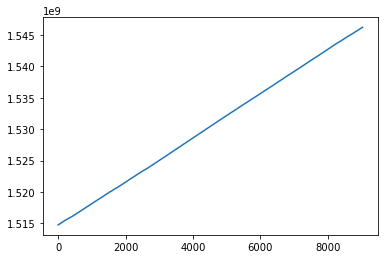

In [16]:
dfweather['dt'].plot()

In [17]:
dfweather['city_name'].unique()

['Custom location']
Categories (1, object): ['Custom location']

In [18]:
dfweather['timezone'].unique()

array([   0, 3600])

<AxesSubplot:>

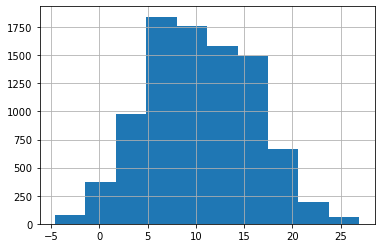

In [19]:
dfweather['temp'].hist()

<AxesSubplot:>

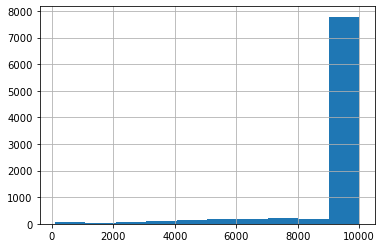

In [20]:
dfweather['visibility'].hist()

<AxesSubplot:>

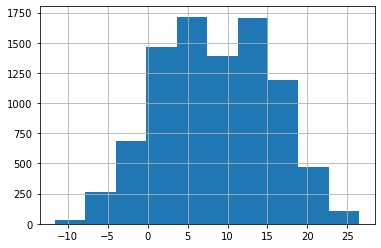

In [21]:
dfweather['feels_like'].hist()

<AxesSubplot:>

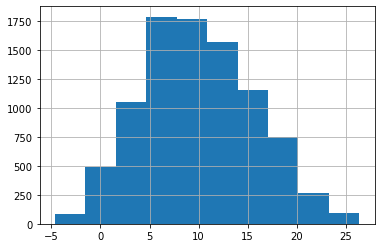

In [66]:
dfweather['temp_min'].hist()

<AxesSubplot:>

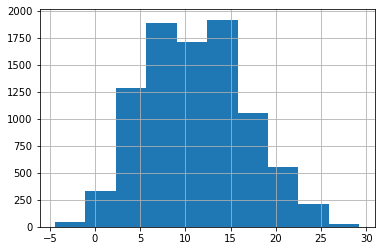

In [67]:
dfweather['temp_max'].hist()

<AxesSubplot:>

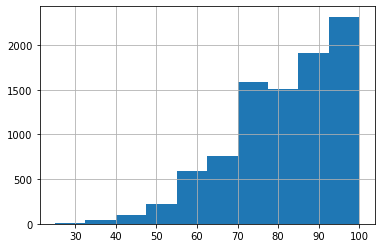

In [68]:
dfweather['humidity'].hist()

<AxesSubplot:>

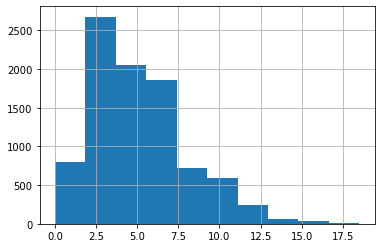

In [69]:
dfweather['wind_speed'].hist()

<AxesSubplot:>

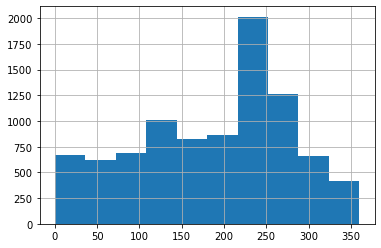

In [70]:
dfweather['wind_deg'].hist()

<AxesSubplot:>

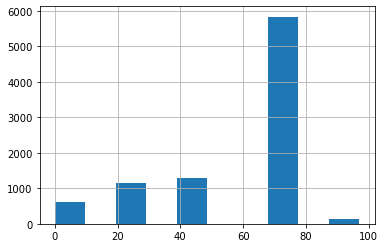

In [71]:
dfweather['clouds_all'].hist()

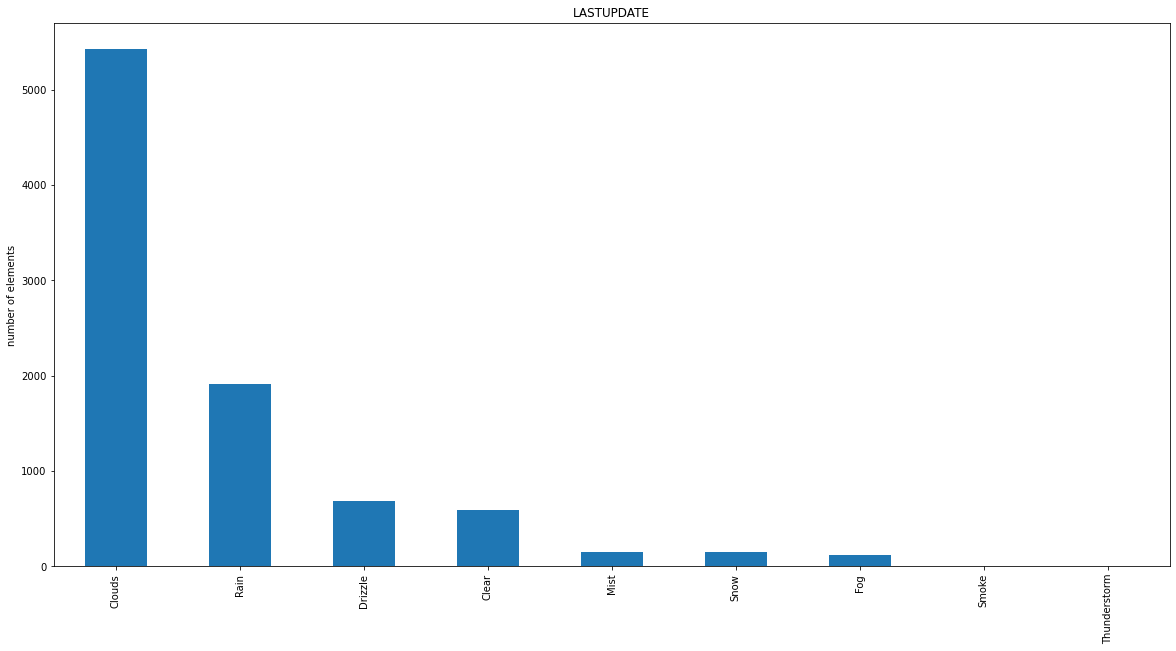

In [72]:
f = dfweather['weather_main'].value_counts(dropna=False).plot(kind='bar', title=column, figsize=(20,10))
plt.ylabel('number of elements')
plt.show()

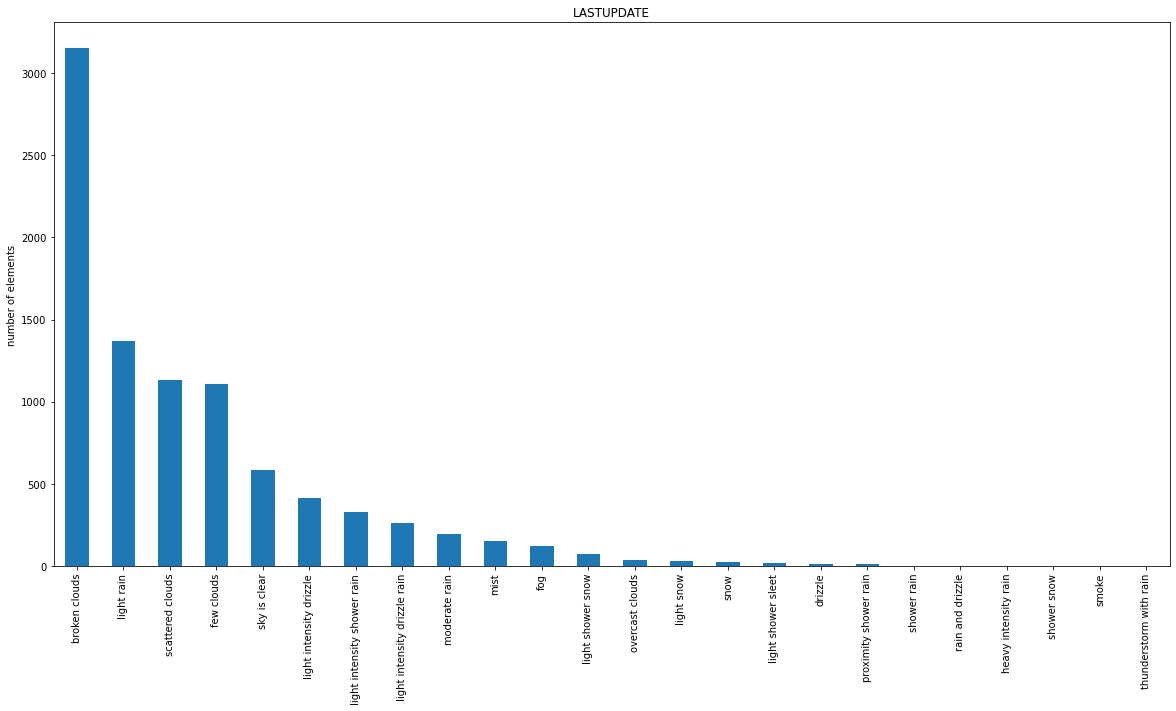

In [73]:
f = dfweather['weather_description'].value_counts(dropna=False).plot(kind='bar', title=column, figsize=(20,10))
plt.ylabel('number of elements')
plt.show()

## Data Quality Report of weather data

After the data understanding processes above, I consider keeping the following features which is useful for model training:

- dt_iso
- temp
- visibility
- dew_point
- feels_like
- pressure
- humidity
- wind_speed
- wind_deg
- wind_gust
- rain_1h
- snow_1h
- clouds_all
- weather_main
- weather_description


## Data Preperation of dftrips dataframe.

In [29]:
# Dropping DATASOURCE, BASIN, TENDERLOT, LASTUPDATE, SUPPRESSED, NOTE and JUSTIFICATIONID
dftrips = dftrips.drop(columns=['DATASOURCE', 'BASIN', 'TENDERLOT', 'LASTUPDATE', 'NOTE', 'JUSTIFICATIONID','SUPPRESSED'])
dftrips.head()

,DAYOFSERVICE,TRIPID,LINEID,ROUTEID,DIRECTION,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP
0,2018-02-07,6253783,68,68_80,1,87245,84600,87524.0,84600.0
1,2018-02-07,6262138,25B,25B_271,2,30517,26460,32752.0,NaN
2,2018-02-07,6254942,45A,45A_70,2,35512,32100,36329.0,32082.0
3,2018-02-07,6259460,25A,25A_273,1,57261,54420,58463.0,54443.0
4,2018-02-07,6253175,14,14_15,1,85383,81600,84682.0,81608.0


In [30]:
#Dropping the instances failed in test4
dftrips = dftrips.drop(index = index_of_test4)

In [31]:
#reset the index
dftrips.reset_index(drop=True, inplace=True)

In [32]:
#Calculate the estimated trip time of each trip
dftrips['PLANNED_TRIPTIME(s)'] = 0
for i in range(len(dftrips)):
    dftrips['PLANNED_TRIPTIME(s)'][i] = (dftrips['PLANNEDTIME_ARR'][i] - dftrips['PLANNEDTIME_DEP'][i])

<ipython-input-32-595d60336061>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dftrips['PLANNED_TRIPTIME(s)'][i] = (dftrips['PLANNEDTIME_ARR'][i] - dftrips['PLANNEDTIME_DEP'][i])


In [33]:
#Calculate the actual trip time of each trip
#Use the planned date instead if the actual data is missing.
dftrips['ACTUAL_TRIPTIME(s)'] = 0
for i in range(len(dftrips)):
    if (np.isnan(dftrips["ACTUALTIME_ARR"][i])) | (np.isnan(dftrips["ACTUALTIME_DEP"][i])):
        dftrips['ACTUAL_TRIPTIME(s)'][i] = (dftrips['PLANNEDTIME_ARR'][i] - dftrips['PLANNEDTIME_DEP'][i])
    else:
        dftrips['ACTUAL_TRIPTIME(s)'][i] = (dftrips['ACTUALTIME_ARR'][i] - dftrips['ACTUALTIME_DEP'][i])
    

dftrips.head()

<ipython-input-33-0273b976b5e5>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dftrips['ACTUAL_TRIPTIME(s)'][i] = (dftrips['ACTUALTIME_ARR'][i] - dftrips['ACTUALTIME_DEP'][i])
<ipython-input-33-0273b976b5e5>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dftrips['ACTUAL_TRIPTIME(s)'][i] = (dftrips['PLANNEDTIME_ARR'][i] - dftrips['PLANNEDTIME_DEP'][i])


,DAYOFSERVICE,TRIPID,LINEID,ROUTEID,DIRECTION,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,PLANNED_TRIPTIME(s),ACTUAL_TRIPTIME(s)
0,2018-02-07,6253783,68,68_80,1,87245,84600,87524.0,84600.0,2645,2924
1,2018-02-07,6262138,25B,25B_271,2,30517,26460,32752.0,NaN,4057,4057
2,2018-02-07,6254942,45A,45A_70,2,35512,32100,36329.0,32082.0,3412,4247
3,2018-02-07,6259460,25A,25A_273,1,57261,54420,58463.0,54443.0,2841,4020
4,2018-02-07,6253175,14,14_15,1,85383,81600,84682.0,81608.0,3783,3074


In [34]:
# getting the mean difference between PLANNED_TRIPTIME(s) and ACTUAL_TRIPTIME(s)
(abs(dftrips['PLANNED_TRIPTIME(s)'] - dftrips['ACTUAL_TRIPTIME(s)'])).mean()

412.55484267369945

In [35]:
#Adding the feature of hour of the day.
#Here we will average the time values of 'PLANNEDTIME_ARR' and 'PLANNEDTIME_DEP'
dftrips['HOUROFDAY'] = (((dftrips['PLANNEDTIME_ARR'] + dftrips['PLANNEDTIME_DEP']) / 2)//3600)
dftrips.head()

,DAYOFSERVICE,TRIPID,LINEID,ROUTEID,DIRECTION,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,PLANNED_TRIPTIME(s),ACTUAL_TRIPTIME(s),HOUROFDAY
0,2018-02-07,6253783,68,68_80,1,87245,84600,87524.0,84600.0,2645,2924,23.0
1,2018-02-07,6262138,25B,25B_271,2,30517,26460,32752.0,NaN,4057,4057,7.0
2,2018-02-07,6254942,45A,45A_70,2,35512,32100,36329.0,32082.0,3412,4247,9.0
3,2018-02-07,6259460,25A,25A_273,1,57261,54420,58463.0,54443.0,2841,4020,15.0
4,2018-02-07,6253175,14,14_15,1,85383,81600,84682.0,81608.0,3783,3074,23.0


In [36]:
dftrips['HOUROFDAY'].value_counts()

17.0    160179
8.0     158821
18.0    145099
16.0    140464
9.0     134291
13.0    130280
7.0     129831
15.0    128495
14.0    127069
10.0    126411
12.0    124981
11.0    124787
19.0    120853
20.0    100792
21.0     93101
23.0     91548
22.0     87990
6.0      51746
5.0       3404
24.0      2289
4.0        103
Name: HOUROFDAY, dtype: int64

In [37]:
dftrips['HOUROFDAY'].isna().sum()

0

In [38]:
# test = dftrips[dftrips['HOUROFDAY'] >= 24]
# index = test.index
# dftrips[dftrips['HOUROFDAY'] >= 24]

In [39]:
# print(index)

In [40]:
#Check if the value of 'HOUROFDAY' is greater of equal to 24, increment the value of 'DAYOFSERVICE'
for i in range(len(dftrips['HOUROFDAY'])):
    if dftrips['HOUROFDAY'][i] >=24:
        dftrips['HOUROFDAY'][i] -= 24
        dftrips['DAYOFSERVICE'][i] = dftrips['DAYOFSERVICE'][i] + pd.DateOffset(1)

dftrips[(dftrips['HOUROFDAY'] >= 24)]

<ipython-input-40-faf30a52135f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dftrips['HOUROFDAY'][i] -= 24
<ipython-input-40-faf30a52135f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dftrips['DAYOFSERVICE'][i] = dftrips['DAYOFSERVICE'][i] + pd.DateOffset(1)


,DAYOFSERVICE,TRIPID,LINEID,ROUTEID,DIRECTION,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,PLANNED_TRIPTIME(s),ACTUAL_TRIPTIME(s),HOUROFDAY


In [41]:
dftrips.loc[1128]


DAYOFSERVICE           2018-04-12 00:00:00
TRIPID                             6618375
LINEID                                 33B
ROUTEID                             33B_56
DIRECTION                                1
PLANNEDTIME_ARR                      87084
PLANNEDTIME_DEP                      85800
ACTUALTIME_ARR                     87047.0
ACTUALTIME_DEP                     85811.0
PLANNED_TRIPTIME(s)                   1284
ACTUAL_TRIPTIME(s)                    1236
HOUROFDAY                              0.0
Name: 1128, dtype: object

In [42]:
#Adding the feature of day of the week.
s = pd.date_range('2018-1-1', '2018-12-31', freq='D').to_series()
dftrips['DAYOFWEEK'] = dftrips['DAYOFSERVICE'].dt.dayofweek
dftrips.head()

,DAYOFSERVICE,TRIPID,LINEID,ROUTEID,DIRECTION,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,PLANNED_TRIPTIME(s),ACTUAL_TRIPTIME(s),HOUROFDAY,DAYOFWEEK
0,2018-02-07,6253783,68,68_80,1,87245,84600,87524.0,84600.0,2645,2924,23.0,2
1,2018-02-07,6262138,25B,25B_271,2,30517,26460,32752.0,NaN,4057,4057,7.0,2
2,2018-02-07,6254942,45A,45A_70,2,35512,32100,36329.0,32082.0,3412,4247,9.0,2
3,2018-02-07,6259460,25A,25A_273,1,57261,54420,58463.0,54443.0,2841,4020,15.0,2
4,2018-02-07,6253175,14,14_15,1,85383,81600,84682.0,81608.0,3783,3074,23.0,2


In [43]:
#Adding the feature of month of the year.
dftrips['MONTHOFYEAR'] = dftrips['DAYOFSERVICE'].dt.month
dftrips.head()
#Save a copy verstion
dftrips_copy = dftrips

In [44]:
dftrips_copy.to_csv("trips_copy.csv", index=False)

In [113]:
dftrips[dftrips['TRIPID'] == 5970412]

,DAYOFSERVICE,TRIPID,LINEID,ROUTEID,DIRECTION,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,PLANNED_TRIPTIME(s),ACTUAL_TRIPTIME(s),HOUROFDAY,DAYOFWEEK,MONTHOFYEAR
2073732,2018-01-01,5970412,46A,46A_73,1,85212,84600,85024.0,84442.0,612,582,23.0,0,1


In [114]:
#Adding the information of 'HOUROFDAY' to the 'DAYOFSERVICE' column
for i in range(len(dftrips['DAYOFSERVICE'])):
    dftrips['DAYOFSERVICE'][i] = dftrips['DAYOFSERVICE'][i] + pd.Timedelta(hours=dftrips['HOUROFDAY'][i])
    
dftrips['DAYOFSERVICE'].head()

<ipython-input-114-8d7946820e50>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dftrips['DAYOFSERVICE'][i] = dftrips['DAYOFSERVICE'][i] + pd.Timedelta(hours=dftrips['HOUROFDAY'][i])


0   2018-02-07 23:00:00
1   2018-02-07 07:00:00
2   2018-02-07 09:00:00
3   2018-02-07 15:00:00
4   2018-02-07 23:00:00
Name: DAYOFSERVICE, dtype: datetime64[ns]

In [115]:
dftrips.head()

,DAYOFSERVICE,TRIPID,LINEID,ROUTEID,DIRECTION,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,PLANNED_TRIPTIME(s),ACTUAL_TRIPTIME(s),HOUROFDAY,DAYOFWEEK,MONTHOFYEAR
0,2018-02-07 23:00:00,6253783,68,68_80,1,87245,84600,87524.0,84600.0,2645,2924,23.0,2,2
1,2018-02-07 07:00:00,6262138,25B,25B_271,2,30517,26460,32752.0,NaN,4057,4057,7.0,2,2
2,2018-02-07 09:00:00,6254942,45A,45A_70,2,35512,32100,36329.0,32082.0,3412,4247,9.0,2,2
3,2018-02-07 15:00:00,6259460,25A,25A_273,1,57261,54420,58463.0,54443.0,2841,4020,15.0,2,2
4,2018-02-07 23:00:00,6253175,14,14_15,1,85383,81600,84682.0,81608.0,3783,3074,23.0,2,2


Now we can see that the data of dftrips is cleaned and ready to get it mergered with the weather data


## Data Preperation of dfweather dataframe

In [22]:
#Drop unnecessary column
drop_column = ['dt', 'timezone', 'city_name','lat','lon','temp_min','temp_max','sea_level','grnd_level','rain_3h', 'snow_3h','weather_id','weather_icon']
dfweather = dfweather.drop(columns=drop_column)
dfweather.head()

,dt_iso,temp,visibility,dew_point,feels_like,pressure,humidity,wind_speed,wind_deg,wind_gust,rain_1h,snow_1h,clouds_all,weather_main,weather_description
0,2018-01-01 00:00:00,4.39,9999.0,2.26,-1.93,990,86,12.9,240,18.0,NaN,NaN,40,Rain,light intensity shower rain
1,2018-01-01 01:00:00,4.39,9999.0,2.26,-1.68,990,86,11.8,240,NaN,NaN,NaN,75,Rain,light intensity shower rain
2,2018-01-01 02:00:00,5.39,9999.0,2.40,-0.47,990,81,12.4,240,18.5,NaN,NaN,40,Clouds,scattered clouds
3,2018-01-01 03:00:00,5.39,9999.0,2.40,-0.47,990,81,12.4,240,NaN,NaN,NaN,40,Clouds,scattered clouds
4,2018-01-01 04:00:00,5.39,9999.0,2.40,-0.33,989,81,11.8,240,NaN,NaN,NaN,40,Clouds,scattered clouds


In [23]:
#Remane 'dt_iso' into 'DAYOFSERVICE'
dfweather = dfweather.rename(columns={'dt_iso': 'DAYOFSERVICE'})
dfweather.head()

,DAYOFSERVICE,temp,visibility,dew_point,feels_like,pressure,humidity,wind_speed,wind_deg,wind_gust,rain_1h,snow_1h,clouds_all,weather_main,weather_description
0,2018-01-01 00:00:00,4.39,9999.0,2.26,-1.93,990,86,12.9,240,18.0,NaN,NaN,40,Rain,light intensity shower rain
1,2018-01-01 01:00:00,4.39,9999.0,2.26,-1.68,990,86,11.8,240,NaN,NaN,NaN,75,Rain,light intensity shower rain
2,2018-01-01 02:00:00,5.39,9999.0,2.40,-0.47,990,81,12.4,240,18.5,NaN,NaN,40,Clouds,scattered clouds
3,2018-01-01 03:00:00,5.39,9999.0,2.40,-0.47,990,81,12.4,240,NaN,NaN,NaN,40,Clouds,scattered clouds
4,2018-01-01 04:00:00,5.39,9999.0,2.40,-0.33,989,81,11.8,240,NaN,NaN,NaN,40,Clouds,scattered clouds


In [24]:
dfweather.dtypes

DAYOFSERVICE           datetime64[ns]
temp                          float64
visibility                    float64
dew_point                     float64
feels_like                    float64
pressure                        int64
humidity                        int64
wind_speed                    float64
wind_deg                        int64
wind_gust                     float64
rain_1h                       float64
snow_1h                       float64
clouds_all                      int64
weather_main                 category
weather_description          category
dtype: object

In [29]:
dfweather['visibility'].fillna(0, inplace=True)
dfweather['wind_gust'].fillna(0, inplace=True)
dfweather['rain_1h'].fillna(0, inplace=True)
dfweather['snow_1h'].fillna(0, inplace=True)

In [30]:
#Save the new weather data
dfweather.to_csv("weather2018_clean.csv", index=False)

In [78]:
dftrips.head()

,DAYOFSERVICE,TRIPID,LINEID,ROUTEID,DIRECTION,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,PLANNED_TRIPTIME(s),ACTUAL_TRIPTIME(s),HOUROFDAY,DAYOFWEEK,MONTHOFYEAR
0,2018-02-07,6253783,68,68_80,1,87245,84600,87524.0,84600.0,2645,2924,23.0,2,2
1,2018-02-07,6262138,25B,25B_271,2,30517,26460,32752.0,NaN,4057,4057,7.0,2,2
2,2018-02-07,6254942,45A,45A_70,2,35512,32100,36329.0,32082.0,3412,4247,9.0,2,2
3,2018-02-07,6259460,25A,25A_273,1,57261,54420,58463.0,54443.0,2841,4020,15.0,2,2
4,2018-02-07,6253175,14,14_15,1,85383,81600,84682.0,81608.0,3783,3074,23.0,2,2


In the following cells, I will try to merge the weather data into the dftrips dataframe.

In [79]:
# merging dftrips data with weather data (merge on date and hour)
dftrips_new = dftrips.merge(dfweather, on=['DAYOFSERVICE'])


In [80]:
dftrips_new.head()

,DAYOFSERVICE,TRIPID,LINEID,ROUTEID,DIRECTION,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,PLANNED_TRIPTIME(s),...,pressure,humidity,wind_speed,wind_deg,wind_gust,rain_1h,snow_1h,clouds_all,weather_main,weather_description
0,2018-02-07,6253783,68,68_80,1,87245,84600,87524.0,84600.0,2645,...,1024,100,5.7,290,NaN,NaN,NaN,20,Clouds,few clouds
1,2018-02-07,6262138,25B,25B_271,2,30517,26460,32752.0,NaN,4057,...,1024,100,5.7,290,NaN,NaN,NaN,20,Clouds,few clouds
2,2018-02-07,6254942,45A,45A_70,2,35512,32100,36329.0,32082.0,3412,...,1024,100,5.7,290,NaN,NaN,NaN,20,Clouds,few clouds
3,2018-02-07,6259460,25A,25A_273,1,57261,54420,58463.0,54443.0,2841,...,1024,100,5.7,290,NaN,NaN,NaN,20,Clouds,few clouds
4,2018-02-07,6253175,14,14_15,1,85383,81600,84682.0,81608.0,3783,...,1024,100,5.7,290,NaN,NaN,NaN,20,Clouds,few clouds


In [122]:
dftrips_new.shape

(2249788, 28)

In [123]:
#Save the dftrips_new to a local file
dftrips_new.to_csv("trips_readyformodeling.csv", index=False)

## Data Preperation of df_line46A dataframe.

In [162]:
# Dropping unnecessary columns
df_line46A = df_line46A.drop(columns=['DATASOURCE', 'VEHICLEID', 'PASSENGERS','PASSENGERSIN','PASSENGERSOUT', 'DISTANCE', 'SUPPRESSED', 'LASTUPDATE', 'NOTE', 'JUSTIFICATIONID'])
df_line46A.head()

,DAYOFSERVICE,TRIPID,PROGRNUMBER,STOPPOINTID,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP
0,2018-01-01,5970412,1,807,84600,84600,84442,84442
1,2018-01-01,5970412,2,808,84644,84644,84617,84617
2,2018-01-01,5970412,3,809,84670,84670,84631,84631
3,2018-01-01,5970412,6,812,84754,84754,84676,84676
4,2018-01-01,5970412,7,813,84776,84776,84691,84691


In [163]:
dftrips_copy

,DAYOFSERVICE,TRIPID,LINEID,ROUTEID,DIRECTION,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,PLANNED_TRIPTIME(s),ACTUAL_TRIPTIME(s),HOUROFDAY,DAYOFWEEK,MONTHOFYEAR
0,2018-02-07,6253783,68,68_80,1,87245,84600,87524.0,84600.0,2645,2924,23.0,2,2
1,2018-02-07,6262138,25B,25B_271,2,30517,26460,32752.0,NaN,4057,4057,7.0,2,2
2,2018-02-07,6254942,45A,45A_70,2,35512,32100,36329.0,32082.0,3412,4247,9.0,2,2
3,2018-02-07,6259460,25A,25A_273,1,57261,54420,58463.0,54443.0,2841,4020,15.0,2,2
4,2018-02-07,6253175,14,14_15,1,85383,81600,84682.0,81608.0,3783,3074,23.0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2182529,2018-05-14,6765849,123,123_36,2,61560,57840,61365.0,57859.0,3720,3506,16.0,0,5
2182530,2018-05-14,6765469,75,75_17,1,53416,48600,NaN,48823.0,4816,4816,14.0,0,5
2182531,2018-05-14,6765486,33D,33D_62,2,29460,26400,29904.0,NaN,3060,3060,7.0,0,5
2182532,2018-05-14,6764987,70,70_60,1,65277,60600,66341.0,NaN,4677,4677,17.0,0,5


In [164]:
dftrips_copy['ROUTEID'][dftrips_copy['LINEID'] == "46A"]

15         46A_74
20         46A_74
88         46A_67
89         46A_67
90         46A_67
            ...  
2182305    46A_67
2182310    46A_67
2182355    46A_74
2182367    46A_74
2182432    46A_74
Name: ROUTEID, Length: 76726, dtype: category
Categories (588, object): ['102_10', '102_8', '102_9', '104_15', ..., '9_5', '9_6', '9_7', '9_8']

In [165]:
df_line46A_merged=df_line46A.merge(dftrips_copy, on = ['DAYOFSERVICE', 'TRIPID'])

In [166]:
df_line46A_merged.head(10)

,DAYOFSERVICE,TRIPID,PROGRNUMBER,STOPPOINTID,PLANNEDTIME_ARR_x,PLANNEDTIME_DEP_x,ACTUALTIME_ARR_x,ACTUALTIME_DEP_x,LINEID,ROUTEID,DIRECTION,PLANNEDTIME_ARR_y,PLANNEDTIME_DEP_y,ACTUALTIME_ARR_y,ACTUALTIME_DEP_y,PLANNED_TRIPTIME(s),ACTUAL_TRIPTIME(s),HOUROFDAY,DAYOFWEEK,MONTHOFYEAR
0,2018-01-01,5970412,1,807,84600,84600,84442,84442,46A,46A_73,1,85212,84600,85024.0,84442.0,612,582,23.0,0,1
1,2018-01-01,5970412,2,808,84644,84644,84617,84617,46A,46A_73,1,85212,84600,85024.0,84442.0,612,582,23.0,0,1
2,2018-01-01,5970412,3,809,84670,84670,84631,84631,46A,46A_73,1,85212,84600,85024.0,84442.0,612,582,23.0,0,1
3,2018-01-01,5970412,6,812,84754,84754,84676,84676,46A,46A_73,1,85212,84600,85024.0,84442.0,612,582,23.0,0,1
4,2018-01-01,5970412,7,813,84776,84776,84691,84691,46A,46A_73,1,85212,84600,85024.0,84442.0,612,582,23.0,0,1
5,2018-01-01,5970412,9,81,84852,84852,84758,84758,46A,46A_73,1,85212,84600,85024.0,84442.0,612,582,23.0,0,1
6,2018-01-01,5970412,11,818,84914,84914,84792,84792,46A,46A_73,1,85212,84600,85024.0,84442.0,612,582,23.0,0,1
7,2018-01-01,5970412,12,819,84977,84977,84878,84878,46A,46A_73,1,85212,84600,85024.0,84442.0,612,582,23.0,0,1
8,2018-01-01,5970412,13,264,85044,85044,84912,84912,46A,46A_73,1,85212,84600,85024.0,84442.0,612,582,23.0,0,1
9,2018-01-01,5970412,14,6059,85110,85110,84942,84942,46A,46A_73,1,85212,84600,85024.0,84442.0,612,582,23.0,0,1


In [167]:
for i in range(len(df_line46A_merged)):
    if (np.isnan(df_line46A_merged["ACTUALTIME_DEP_y"][i])):
        df_line46A_merged["ACTUALTIME_DEP_y"][i] = df_line46A_merged["PLANNEDTIME_DEP_y"][i]

<ipython-input-167-4f1a2390b166>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_line46A_merged["ACTUALTIME_DEP_y"][i] = df_line46A_merged["PLANNEDTIME_DEP_y"][i]


In [168]:
df_line46A_merged.isna().sum()

DAYOFSERVICE                0
TRIPID                      0
PROGRNUMBER                 0
STOPPOINTID                 0
PLANNEDTIME_ARR_x           0
PLANNEDTIME_DEP_x           0
ACTUALTIME_ARR_x            0
ACTUALTIME_DEP_x            0
LINEID                      0
ROUTEID                     0
DIRECTION                   0
PLANNEDTIME_ARR_y           0
PLANNEDTIME_DEP_y           0
ACTUALTIME_ARR_y       177370
ACTUALTIME_DEP_y            0
PLANNED_TRIPTIME(s)         0
ACTUAL_TRIPTIME(s)          0
HOUROFDAY                   0
DAYOFWEEK                   0
MONTHOFYEAR                 0
dtype: int64

In [169]:
#Calculate the accumulated travel time
df_line46A_merged['ACC_TRAVELTIME(s)'] = (df_line46A_merged['ACTUALTIME_ARR_x'] - df_line46A_merged['ACTUALTIME_DEP_y'])


In [170]:
df_line46A_merged['ACC_TRAVELTIME(s)'].isna().sum()

0

In [171]:
df_line46A_merged.head()

,DAYOFSERVICE,TRIPID,PROGRNUMBER,STOPPOINTID,PLANNEDTIME_ARR_x,PLANNEDTIME_DEP_x,ACTUALTIME_ARR_x,ACTUALTIME_DEP_x,LINEID,ROUTEID,...,PLANNEDTIME_ARR_y,PLANNEDTIME_DEP_y,ACTUALTIME_ARR_y,ACTUALTIME_DEP_y,PLANNED_TRIPTIME(s),ACTUAL_TRIPTIME(s),HOUROFDAY,DAYOFWEEK,MONTHOFYEAR,ACC_TRAVELTIME(s)
0,2018-01-01,5970412,1,807,84600,84600,84442,84442,46A,46A_73,...,85212,84600,85024.0,84442.0,612,582,23.0,0,1,0.0
1,2018-01-01,5970412,2,808,84644,84644,84617,84617,46A,46A_73,...,85212,84600,85024.0,84442.0,612,582,23.0,0,1,175.0
2,2018-01-01,5970412,3,809,84670,84670,84631,84631,46A,46A_73,...,85212,84600,85024.0,84442.0,612,582,23.0,0,1,189.0
3,2018-01-01,5970412,6,812,84754,84754,84676,84676,46A,46A_73,...,85212,84600,85024.0,84442.0,612,582,23.0,0,1,234.0
4,2018-01-01,5970412,7,813,84776,84776,84691,84691,46A,46A_73,...,85212,84600,85024.0,84442.0,612,582,23.0,0,1,249.0


In [172]:
#ONLY keep the columnd we need
df_line46A_merged = df_line46A_merged[['DAYOFSERVICE','TRIPID','PROGRNUMBER','STOPPOINTID','LINEID','DIRECTION','PLANNED_TRIPTIME(s)','ACTUAL_TRIPTIME(s)','HOUROFDAY','DAYOFWEEK','MONTHOFYEAR','ACC_TRAVELTIME(s)']]
df_line46A_merged.head()

,DAYOFSERVICE,TRIPID,PROGRNUMBER,STOPPOINTID,LINEID,DIRECTION,PLANNED_TRIPTIME(s),ACTUAL_TRIPTIME(s),HOUROFDAY,DAYOFWEEK,MONTHOFYEAR,ACC_TRAVELTIME(s)
0,2018-01-01,5970412,1,807,46A,1,612,582,23.0,0,1,0.0
1,2018-01-01,5970412,2,808,46A,1,612,582,23.0,0,1,175.0
2,2018-01-01,5970412,3,809,46A,1,612,582,23.0,0,1,189.0
3,2018-01-01,5970412,6,812,46A,1,612,582,23.0,0,1,234.0
4,2018-01-01,5970412,7,813,46A,1,612,582,23.0,0,1,249.0


In [173]:
#Adding the information of 'HOUROFDAY' to the 'DAYOFSERVICE' column
for i in range(len(df_line46A_merged['DAYOFSERVICE'])):
    df_line46A_merged['DAYOFSERVICE'][i] = df_line46A_merged['DAYOFSERVICE'][i] + pd.Timedelta(hours=df_line46A_merged['HOUROFDAY'][i])
    
df_line46A_merged['DAYOFSERVICE'].head()

<ipython-input-173-0bd75ffc450c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_line46A_merged['DAYOFSERVICE'][i] = df_line46A_merged['DAYOFSERVICE'][i] + pd.Timedelta(hours=df_line46A_merged['HOUROFDAY'][i])


0   2018-01-01 23:00:00
1   2018-01-01 23:00:00
2   2018-01-01 23:00:00
3   2018-01-01 23:00:00
4   2018-01-01 23:00:00
Name: DAYOFSERVICE, dtype: datetime64[ns]

In [174]:
# merging dftrips data with weather data (merge on date and hour)
df_line46A_merged = df_line46A_merged.merge(dfweather, on=['DAYOFSERVICE'])

In [175]:
df_line46A_merged.head(10)

,DAYOFSERVICE,TRIPID,PROGRNUMBER,STOPPOINTID,LINEID,DIRECTION,PLANNED_TRIPTIME(s),ACTUAL_TRIPTIME(s),HOUROFDAY,DAYOFWEEK,...,pressure,humidity,wind_speed,wind_deg,wind_gust,rain_1h,snow_1h,clouds_all,weather_main,weather_description
0,2018-01-01 23:00:00,5970412,1,807,46A,1,612,582,23.0,0,...,1008,75,7.2,260,NaN,NaN,NaN,40,Clouds,scattered clouds
1,2018-01-01 23:00:00,5970412,2,808,46A,1,612,582,23.0,0,...,1008,75,7.2,260,NaN,NaN,NaN,40,Clouds,scattered clouds
2,2018-01-01 23:00:00,5970412,3,809,46A,1,612,582,23.0,0,...,1008,75,7.2,260,NaN,NaN,NaN,40,Clouds,scattered clouds
3,2018-01-01 23:00:00,5970412,6,812,46A,1,612,582,23.0,0,...,1008,75,7.2,260,NaN,NaN,NaN,40,Clouds,scattered clouds
4,2018-01-01 23:00:00,5970412,7,813,46A,1,612,582,23.0,0,...,1008,75,7.2,260,NaN,NaN,NaN,40,Clouds,scattered clouds
5,2018-01-01 23:00:00,5970412,9,81,46A,1,612,582,23.0,0,...,1008,75,7.2,260,NaN,NaN,NaN,40,Clouds,scattered clouds
6,2018-01-01 23:00:00,5970412,11,818,46A,1,612,582,23.0,0,...,1008,75,7.2,260,NaN,NaN,NaN,40,Clouds,scattered clouds
7,2018-01-01 23:00:00,5970412,12,819,46A,1,612,582,23.0,0,...,1008,75,7.2,260,NaN,NaN,NaN,40,Clouds,scattered clouds
8,2018-01-01 23:00:00,5970412,13,264,46A,1,612,582,23.0,0,...,1008,75,7.2,260,NaN,NaN,NaN,40,Clouds,scattered clouds
9,2018-01-01 23:00:00,5970412,14,6059,46A,1,612,582,23.0,0,...,1008,75,7.2,260,NaN,NaN,NaN,40,Clouds,scattered clouds


In [176]:
#Save the df_line46A_merged to a local file
df_line46A_merged.to_csv("leavetimes_line46A_readyformodeling.csv", index=False)

In [ ]:
# 1/0: Weekday/Weekend
# 1/0: Rush hour

In [ ]:
# Outliers investigation
# Route ID investigation
# Estimated triptime(min)

In [180]:
df_line46A_merged['WEEKDAY/WEEKEND'] = 0
for i in range(len(df_line46A_merged)):
    if (df_line46A_merged['DAYOFWEEK'][i] == 5) | (df_line46A_merged['DAYOFWEEK'][i] == 6):
        df_line46A_merged['WEEKDAY/WEEKEND'][i] = 1

<ipython-input-180-4d5c6e3c8596>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_line46A_merged['WEEKDAY/WEEKEND'][i] = 1


In [197]:
df_line46A_merged['RUSHHOUR'] = 0
df_line46A_merged['RUSHHOUR'].loc[((df_line46A_merged['HOUROFDAY']<=9) & (df_line46A_merged['HOUROFDAY']>=7) | (df_line46A_merged['HOUROFDAY']<=19) & (df_line46A_merged['HOUROFDAY']>=17))] = 1

/Users/oujunhao/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [199]:
df_line46A_merged.loc[((df_line46A_merged['HOUROFDAY']<=9) & (df_line46A_merged['HOUROFDAY']>=7) | (df_line46A_merged['HOUROFDAY']<=19) & (df_line46A_merged['HOUROFDAY']>=17))]

,DAYOFSERVICE,TRIPID,PROGRNUMBER,STOPPOINTID,LINEID,DIRECTION,PLANNED_TRIPTIME(s),ACTUAL_TRIPTIME(s),HOUROFDAY,DAYOFWEEK,...,wind_speed,wind_deg,wind_gust,rain_1h,snow_1h,clouds_all,weather_main,weather_description,WEEKDAY/WEEKEND,RUSHHOUR
341,2018-01-01 19:00:00,5957297,13,264,46A,1,3425,3391,19.0,0,...,8.20,270,NaN,NaN,NaN,40,Clouds,scattered clouds,0,1
342,2018-01-01 19:00:00,5957297,15,334,46A,1,3425,3391,19.0,0,...,8.20,270,NaN,NaN,NaN,40,Clouds,scattered clouds,0,1
343,2018-01-01 19:00:00,5957297,16,406,46A,1,3425,3391,19.0,0,...,8.20,270,NaN,NaN,NaN,40,Clouds,scattered clouds,0,1
344,2018-01-01 19:00:00,5957297,17,747,46A,1,3425,3391,19.0,0,...,8.20,270,NaN,NaN,NaN,40,Clouds,scattered clouds,0,1
345,2018-01-01 19:00:00,5957297,18,842,46A,1,3425,3391,19.0,0,...,8.20,270,NaN,NaN,NaN,40,Clouds,scattered clouds,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4483868,2018-12-30 17:00:00,8583605,48,7491,46A,2,3859,4861,17.0,6,...,0.89,121,3.13,NaN,NaN,75,Clouds,broken clouds,1,1
4483869,2018-12-30 17:00:00,8583605,17,2060,46A,2,3859,4861,17.0,6,...,0.89,121,3.13,NaN,NaN,75,Clouds,broken clouds,1,1
4483870,2018-12-30 17:00:00,8583605,12,4570,46A,2,3859,4861,17.0,6,...,0.89,121,3.13,NaN,NaN,75,Clouds,broken clouds,1,1
4483871,2018-12-30 17:00:00,8583605,29,2084,46A,2,3859,4861,17.0,6,...,0.89,121,3.13,NaN,NaN,75,Clouds,broken clouds,1,1


In [201]:
df_line46A_merged=df_line46A_merged.drop(columns=['HOUROFDAY','DAYOFWEEK'])

In [203]:
df_line46A_merged.head(10)

,DAYOFSERVICE,TRIPID,PROGRNUMBER,STOPPOINTID,LINEID,DIRECTION,PLANNED_TRIPTIME(s),ACTUAL_TRIPTIME(s),MONTHOFYEAR,ACC_TRAVELTIME(s),...,wind_speed,wind_deg,wind_gust,rain_1h,snow_1h,clouds_all,weather_main,weather_description,WEEKDAY/WEEKEND,RUSHHOUR
0,2018-01-01 23:00:00,5970412,1,807,46A,1,612,582,1,0.0,...,7.2,260,NaN,NaN,NaN,40,Clouds,scattered clouds,0,0
1,2018-01-01 23:00:00,5970412,2,808,46A,1,612,582,1,175.0,...,7.2,260,NaN,NaN,NaN,40,Clouds,scattered clouds,0,0
2,2018-01-01 23:00:00,5970412,3,809,46A,1,612,582,1,189.0,...,7.2,260,NaN,NaN,NaN,40,Clouds,scattered clouds,0,0
3,2018-01-01 23:00:00,5970412,6,812,46A,1,612,582,1,234.0,...,7.2,260,NaN,NaN,NaN,40,Clouds,scattered clouds,0,0
4,2018-01-01 23:00:00,5970412,7,813,46A,1,612,582,1,249.0,...,7.2,260,NaN,NaN,NaN,40,Clouds,scattered clouds,0,0
5,2018-01-01 23:00:00,5970412,9,81,46A,1,612,582,1,316.0,...,7.2,260,NaN,NaN,NaN,40,Clouds,scattered clouds,0,0
6,2018-01-01 23:00:00,5970412,11,818,46A,1,612,582,1,350.0,...,7.2,260,NaN,NaN,NaN,40,Clouds,scattered clouds,0,0
7,2018-01-01 23:00:00,5970412,12,819,46A,1,612,582,1,436.0,...,7.2,260,NaN,NaN,NaN,40,Clouds,scattered clouds,0,0
8,2018-01-01 23:00:00,5970412,13,264,46A,1,612,582,1,470.0,...,7.2,260,NaN,NaN,NaN,40,Clouds,scattered clouds,0,0
9,2018-01-01 23:00:00,5970412,14,6059,46A,1,612,582,1,500.0,...,7.2,260,NaN,NaN,NaN,40,Clouds,scattered clouds,0,0


In [202]:
df_line46A_merged.to_csv("leavetimes_line46A_readyformodeling2.csv", index=False)

In [4]:
# selecting the tripid where lineid is 46A
tripid_67_list = dftrips['TRIPID'][dftrips['LINEID'] == '67'].tolist()

In [5]:
# the file 'rt_leavetimes_DB_2018.txt' too big, we want to only load one route
# Our plan is to process the file in chunks and only add a line 46A to the dataframe

line67_df_list = []
chunksize = 10 ** 6
for chunk in pd.read_csv("rt_leavetimes_DB_2018.txt", sep=';', chunksize=chunksize):
   line67_df_list.append(chunk[chunk['TRIPID'].isin(tripid_67_list)])

df_line67 = pd.concat(line67_df_list)

In [6]:
# #saving the line_46A data to a local csv
df_line67.to_csv("line_67_leavetimes.csv", index=False)

In [7]:
# loading in the line 46A data from the local csv
df_line67 = pd.read_csv("line_67_leavetimes.csv", parse_dates=[1, 16], infer_datetime_format=True)

In [8]:
df_line67.head(10)

,DATASOURCE,DAYOFSERVICE,TRIPID,PROGRNUMBER,STOPPOINTID,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,VEHICLEID,PASSENGERS,PASSENGERSIN,PASSENGERSOUT,DISTANCE,SUPPRESSED,JUSTIFICATIONID,LASTUPDATE,NOTE
0,DB,2018-01-01,5963325,27,4001,61647,61647,61746,61746,2406867,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-08 17:21:10,NaN
1,DB,2018-01-01,5957472,27,4001,58047,58047,57919,57919,2868325,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-08 17:21:10,NaN
2,DB,2018-01-01,5971214,27,4001,59847,59847,59761,59761,2534863,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-08 17:21:10,NaN
3,DB,2018-01-01,5970312,27,4001,67047,67047,66885,66885,2172316,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-08 17:21:10,NaN
4,DB,2018-01-01,5970310,27,4001,56247,56247,56064,56064,2172316,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-08 17:21:10,NaN
5,DB,2018-01-01,5956329,27,4001,63447,63447,63362,63362,2534817,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-08 17:21:10,NaN
6,DB,2018-01-01,5957470,27,4001,47270,47270,47228,47228,2868325,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-08 17:21:10,NaN
7,DB,2018-01-01,5956327,27,4001,52670,52670,52541,52541,2534817,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-08 17:21:10,NaN
8,DB,2018-01-01,5969439,27,4001,45470,45470,45375,45375,2406884,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-08 17:21:10,NaN
9,DB,2018-01-01,5971212,27,4001,49070,49070,48928,48928,2534863,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-08 17:21:10,NaN


In [9]:
df_line67['PROGRNUMBER'].unique()

array([27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
       44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 14,
       15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 60, 61, 63, 64, 65,
       10, 11, 12, 13,  1,  2,  3,  4,  5,  6,  7,  8,  9, 66, 68, 62, 67,
       69])

In [12]:
df_line67[df_line67['STOPPOINTID'] == 2246]

,DATASOURCE,DAYOFSERVICE,TRIPID,PROGRNUMBER,STOPPOINTID,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,VEHICLEID,PASSENGERS,PASSENGERSIN,PASSENGERSOUT,DISTANCE,SUPPRESSED,JUSTIFICATIONID,LASTUPDATE,NOTE
443,DB,2018-01-01,5963321,47,2246,41211,41211,41089,41157,2406867,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-08 17:21:10,NaN
444,DB,2018-01-01,5956325,47,2246,43011,43011,42701,42716,2534817,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-08 17:21:10,NaN
445,DB,2018-01-01,5962589,47,2246,37611,37611,37245,37258,2534864,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-08 17:21:10,NaN
446,DB,2018-01-01,5969437,47,2246,35558,35558,35123,35137,2406884,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-08 17:21:10,NaN
447,DB,2018-01-01,5962306,47,2246,33758,33758,33392,33402,2868322,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-08 17:21:10,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1571013,DB,2018-12-31,8576824,47,2246,50730,50730,51141,51157,2868317,NaN,NaN,NaN,NaN,NaN,NaN,2019-01-16 18:27:21,NaN
1571014,DB,2018-12-31,8581908,47,2246,43661,43661,44147,44179,1000915,NaN,NaN,NaN,NaN,NaN,NaN,2019-01-16 18:27:21,NaN
1571015,DB,2018-12-31,8576370,47,2246,38261,38261,38411,38426,3303835,NaN,NaN,NaN,NaN,NaN,NaN,2019-01-16 18:27:21,NaN
1571016,DB,2018-12-31,8576822,47,2246,40061,40061,39748,39786,2868317,NaN,NaN,NaN,NaN,NaN,NaN,2019-01-16 18:27:21,NaN


In [47]:
dftrips[dftrips['LINEID']=='68']

,DAYOFSERVICE,TRIPID,LINEID,ROUTEID,DIRECTION,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,PLANNED_TRIPTIME(s),ACTUAL_TRIPTIME(s),HOUROFDAY,DAYOFWEEK,MONTHOFYEAR
0,2018-02-07,6253783,68,68_80,1,87245,84600,87524.0,84600.0,2645,2924,23.0,2,2
78,2018-02-18,6263183,68,68_80,1,43305,40200,43313.0,40528.0,3105,2785,11.0,6,2
570,2018-06-26,7111764,68,68_81,1,60472,55800,59962.0,55858.0,4672,4104,16.0,1,6
593,2018-06-21,7023711,68,68_78,1,57296,52200,56558.0,52307.0,5096,4251,15.0,3,6
594,2018-06-21,7023760,68,68_83,2,50761,46800,50674.0,46851.0,3961,3823,13.0,3,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2181400,2018-05-15,6761204,68,68_78,1,56956,52200,57315.0,52203.0,4756,5112,15.0,1,5
2181401,2018-05-15,6761205,68,68_84,2,62233,57600,63331.0,57637.0,4633,5694,16.0,1,5
2181782,2018-05-14,6763285,68,68_78,1,31701,27000,31808.0,27090.0,4701,4718,8.0,0,5
2182181,2018-05-15,6763287,68,68_81,1,41712,37800,41875.0,37763.0,3912,4112,11.0,1,5
